## Building Machine Learning Pipelines: EDA



## Paper Name: Using AI to measure Parkinson's Severity at home

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Paper can be downloaded from the below link
https://www.nature.com/articles/s41746-023-00905-9


### Data:

fingertapping_features_severity_diagnosis_June13_2023 contains all the extracted features from the study participants.
severity_dataset_dropped_correlated_columns drops some features which are highly correlated to one of the remaining features.

### Column Descriptions:

Rating1, Rating3, and Rating4 columns are ratings from three experts.
Rating2 and Rating5 columns are the ratings from two non-experts.
Similarly, Comment1, Comment3, and Comment4 columns are comments from the experts.
CheckDifficult1, CheckDifficult3, and CheckDifficult4 columns identify videos that are difficult to rate and thus marked as low-quality.
Rating is the ground-truth severity rating, based on expert consensus.

In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('fingertapping_features_severity_diagnosis_June13_2023.csv')
dataset = df
## print shape of dataset with  rows and columns
print(dataset.shape)

(489, 134)


In [3]:
## print the top5 records
dataset.head()


Unnamed: 0  wrist_mvmnt_x_median  wrist_mvmnt_x_quartile_range  \
0           0              4.238080                      4.234098   
1           1              2.353139                      2.676330   
2           2              2.414284                      2.435714   
3           3             22.882927                     28.512381   
4           4              1.203146                      1.683577   

   wrist_mvmnt_x_mean  wrist_mvmnt_x_min  wrist_mvmnt_x_max  \
0            4.289725           0.000000          20.329711   
1            2.737808           0.000000          11.511819   
2            2.619451           0.110869           6.318423   
3           23.316811           0.000000         156.339611   
4            1.357783           0.040405           5.137711   

   wrist_mvmnt_x_stdev  wrist_mvmnt_y_median  wrist_mvmnt_y_quartile_range  \
0             4.199564              8.462262                      8.810459   
1             2.270555              5.643571                      6.659994   
2             1.598481             12.464668                     12.223106   
3            26.392967             28.877301                     38.367939   
4             1.139386              6.464794                      6.574934   

   wrist_mvmnt_y_mean  wrist_mvmnt_y_min  wrist_mvmnt_y_max  \
0            8.439464           0.000000          35.881219   
1            6.449475           0.000000          27.636004   
2           16.709834           0.000000          69.834736   
3           30.254645           0.000000         207.739263   
4            8.495438           0.129821          45.059041   

   wrist_mvmnt_y_stdev  wrist_mvmnt_dist_median  \
0             8.112424                 9.500458   
1             5.507754                 6.061910   
2            13.990393                12.611920   
3            35.760512                36.721328   
4             8.334313                 6.539805   

   wrist_mvmnt_dist_quartile_range  wrist_mvmnt_dist_mean  \
0                         9.513357               9.508305   
1                         6.680042               7.152539   
2                        11.447675              17.157925   
3                        48.841525              38.427026   
4                         6.520232               8.738917   

   wrist_mvmnt_dist_min  wrist_mvmnt_dist_max  wrist_mvmnt_dist_stdev  \
0              0.000000             41.240260                9.092095   
1              0.000000             29.937780                5.781287   
2              3.234005             69.964381               13.783030   
3              0.000000            251.346483               44.246851   
4              0.698013             45.217760                8.270813   

   aperiodicity_denoised  aperiodicity_trimmed  periodEntropy_denoised  \
0               1.408849              1.245572                0.320929   
1               2.073631              1.723751                0.487256   
2               2.206180              1.678927                0.325414   
3               1.157455              1.061825                0.452998   
4               1.986317              1.278567                0.256317   

   periodEntropy_trimmed  periodVarianceNorm_denoised  \
0               0.258537                     0.014489   
1               0.398952                     0.059711   
2               0.326438                     0.003021   
3               0.417337                     0.022751   
4               0.104835                     0.016144   

   periodVarianceNorm_trimmed  numInterruptions_denoised  \
0                    0.008446                          0   
1                    0.069197                          1   
2                    0.002699                          0   
3                    0.026311                          1   
4                    0.000508                          1   

   numInterruptions_trimmed  numFreeze_denoised  numFreeze_trimmed  \
0                         0  

In [4]:
# Print column names
print(dataset.columns)

Index(['Unnamed: 0', 'wrist_mvmnt_x_median', 'wrist_mvmnt_x_quartile_range',
       'wrist_mvmnt_x_mean', 'wrist_mvmnt_x_min', 'wrist_mvmnt_x_max',
       'wrist_mvmnt_x_stdev', 'wrist_mvmnt_y_median',
       'wrist_mvmnt_y_quartile_range', 'wrist_mvmnt_y_mean',
       ...
       'Comment3', 'Comment4', 'CheckDifficult1', 'CheckDifficult3',
       'CheckDifficult4', 'gender', 'age', 'diagnosed', 'Rating', 'Rating5'],
      dtype='object', length=134)


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(diagnosed)


## Missing Values

In [5]:
print(dataset.isnull().sum())
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 2),  ' % missing values')

Unnamed: 0                      0
wrist_mvmnt_x_median            0
wrist_mvmnt_x_quartile_range    0
wrist_mvmnt_x_mean              0
wrist_mvmnt_x_min               0
                               ..
gender                          0
age                             0
diagnosed                       0
Rating                          0
Rating5                         0
Length: 134, dtype: int64
amplitude_decrement_last_to_first_half_trimmed 0.0  % missing values
Comment1 0.47  % missing values
Comment3 0.44  % missing values
Comment4 1.0  % missing values


In [6]:
#We Will drop column 'Unnamed 0' and filename
dataset=dataset.drop('Unnamed: 0', axis=1)

In [7]:
dataset=dataset.drop('filename', axis=1)

### Plot Distribution Count for Ground Truth Values (Rating)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


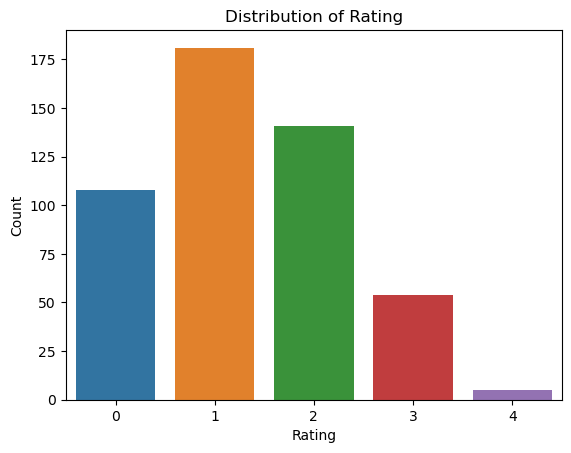

In [8]:
# Plot count distribution of 'diagnosed'
sns.countplot(x='Rating', data=dataset)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Plot Distribution Count for Diagnosed Patients

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


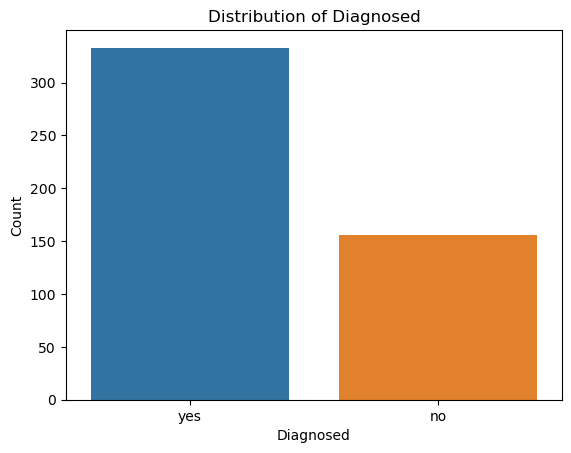

In [9]:
# Plot count distribution of 'diagnosed'
sns.countplot(x='diagnosed', data=dataset)
plt.title('Distribution of Diagnosed')
plt.xlabel('Diagnosed')
plt.ylabel('Count')
plt.show()

In [10]:
# Convert 'no' to 0 and 'yes' to 1 in the 'diagnosed' column
dataset['diagnosed'] = dataset['diagnosed'].map({'no': 0, 'yes': 1})

# Verify the changes
print(dataset['diagnosed'].value_counts())

diagnosed
1    333
0    156
Name: count, dtype: int64


### Plot Distribution Count for Male/Female Gender

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


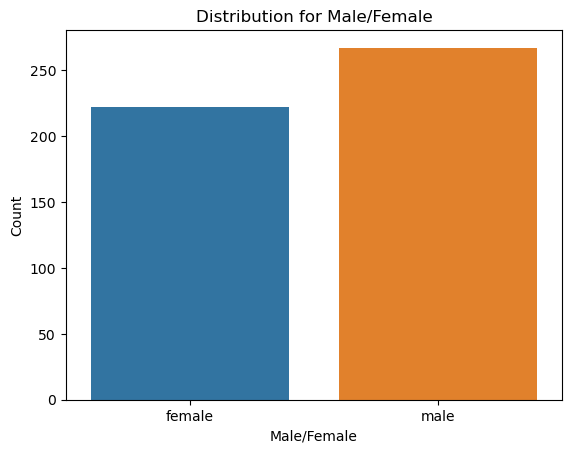

In [11]:
# Plot count distribution of 'gender'
sns.countplot(x='gender', data=dataset)
plt.title('Distribution for Male/Female')
plt.xlabel('Male/Female')
plt.ylabel('Count')
plt.show()

In [12]:
# Convert 'no' to 0 and 'yes' to 1 in the 'gender' column
dataset['gender'] = dataset['gender'].map({'male': 0, 'female': 1})

# Verify the changes
print(dataset['gender'].value_counts())

gender
0    267
1    222
Name: count, dtype: int64


### Plot Distribution Count for Left and Right Hand Data

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


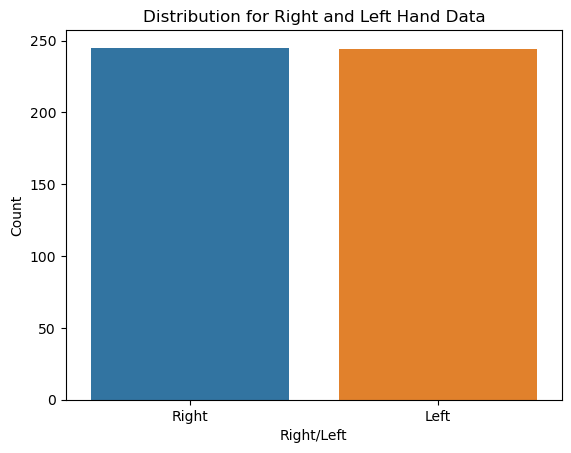

In [13]:
# Plot count distribution of 'gender'
sns.countplot(x='hand', data=dataset)
plt.title('Distribution for Right and Left Hand Data')
plt.xlabel('Right/Left')
plt.ylabel('Count')
plt.show()

In [14]:
# Convert 'no' to 0 and 'yes' to 1 in the 'hand' column
dataset['hand'] = dataset['hand'].map({'Right': 0, 'Left': 1})

# Verify the changes
print(dataset['hand'].value_counts())

hand
0    245
1    244
Name: count, dtype: int64


### Since they are many missing values, we need to find the relationship between missing values and Sales Price

Let's plot some diagram for this relationship


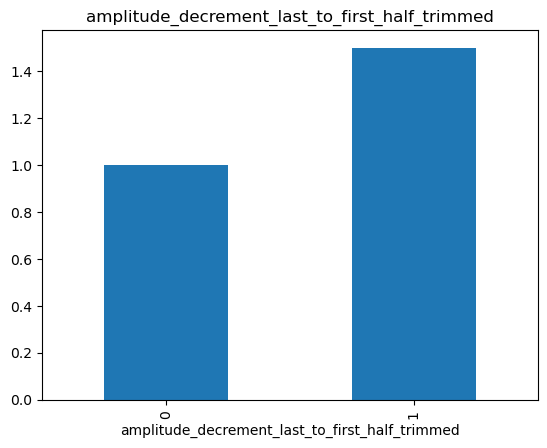

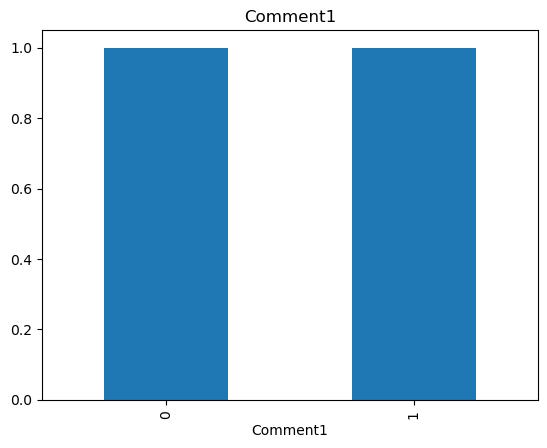

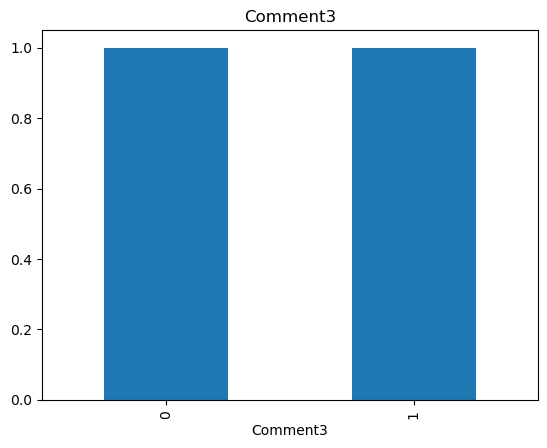

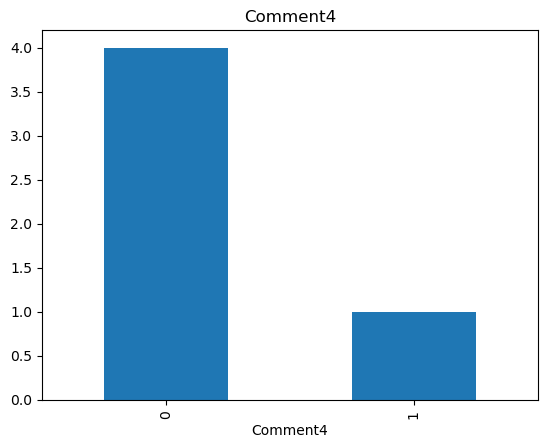

In [15]:
for feature in features_with_na:
    data = dataset.copy()

    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    # let's calculate the mean Rating where the information is missing or present
    data.groupby(feature)['Rating'].median().plot.bar()
    plt.title(feature)
    plt.show()

It suggests that missing values has an impact on Rating variable, so we will use mean interpolation technique to handle missing values

In [16]:
## handle missing data in numerical features with mean imputation
dataset['amplitude_decrement_last_to_first_half_trimmed'].fillna(dataset['amplitude_decrement_last_to_first_half_trimmed'].mean(), inplace=True)

## handle missing data in categorical features with mode imputation
mode_value = dataset['Comment1'].mode()[0]
dataset['Comment1'].fillna(mode_value, inplace=True)

mode_value2 = dataset['Comment3'].mode()[0]
dataset['Comment3'].fillna(mode_value2, inplace=True)

mode_value3 = dataset['Comment4'].mode()[0]
dataset['Comment4'].fillna(mode_value3, inplace=True)

In [17]:
## Recheck missing values

print(dataset.isnull().sum())
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 2),  ' % missing values')

wrist_mvmnt_x_median            0
wrist_mvmnt_x_quartile_range    0
wrist_mvmnt_x_mean              0
wrist_mvmnt_x_min               0
wrist_mvmnt_x_max               0
                               ..
gender                          0
age                             0
diagnosed                       0
Rating                          0
Rating5                         0
Length: 132, dtype: int64


### Numerical Variables

In [18]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  129


wrist_mvmnt_x_median  wrist_mvmnt_x_quartile_range  wrist_mvmnt_x_mean  \
0              4.238080                      4.234098            4.289725   
1              2.353139                      2.676330            2.737808   
2              2.414284                      2.435714            2.619451   
3             22.882927                     28.512381           23.316811   
4              1.203146                      1.683577            1.357783   

   wrist_mvmnt_x_min  wrist_mvmnt_x_max  wrist_mvmnt_x_stdev  \
0           0.000000          20.329711             4.199564   
1           0.000000          11.511819             2.270555   
2           0.110869           6.318423             1.598481   
3           0.000000         156.339611            26.392967   
4           0.040405           5.137711             1.139386   

   wrist_mvmnt_y_median  wrist_mvmnt_y_quartile_range  wrist_mvmnt_y_mean  \
0              8.462262                      8.810459            8.439464   
1              5.643571                      6.659994            6.449475   
2             12.464668                     12.223106           16.709834   
3             28.877301                     38.367939           30.254645   
4              6.464794                      6.574934            8.495438   

   wrist_mvmnt_y_min  wrist_mvmnt_y_max  wrist_mvmnt_y_stdev  \
0           0.000000          35.881219             8.112424   
1           0.000000          27.636004             5.507754   
2           0.000000          69.834736            13.990393   
3           0.000000         207.739263            35.760512   
4           0.129821          45.059041             8.334313   

   wrist_mvmnt_dist_median  wrist_mvmnt_dist_quartile_range  \
0                 9.500458                         9.513357   
1                 6.061910                         6.680042   
2                12.611920                        11.447675   
3                36.721328                        48.841525   
4                 6.539805                         6.520232   

   wrist_mvmnt_dist_mean  wrist_mvmnt_dist_min  wrist_mvmnt_dist_max  \
0               9.508305              0.000000             41.240260   
1               7.152539              0.000000             29.937780   
2              17.157925              3.234005             69.964381   
3              38.427026              0.000000            251.346483   
4               8.738917              0.698013             45.217760   

   wrist_mvmnt_dist_stdev  aperiodicity_denoised  aperiodicity_trimmed  \
0                9.092095               1.408849              1.245572   
1                5.781287               2.073631              1.723751   
2               13.783030               2.206180              1.678927   
3               44.246851               1.157455              1.061825   
4                8.270813               1.986317              1.278567   

   periodEntropy_denoised  periodEntropy_trimmed  periodVarianceNorm_denoised  \
0                0.320929               0.258537                     0.014489   
1                0.487256               0.398952                     0.059711   
2                0.325414               0.326438                     0.003021   
3                0.452998               0.417337                     0.022751   
4                0.256317               0.104835                     0.016144   

   periodVarianceNorm_trimmed  numInterruptions_denoised  \
0                    0.008446                          0   
1                    0.069197                          1   
2                    0.002699                          0   
3                    0.026311                          1   
4                    0.000508                          1   

   numInterruptions_trimmed  numFreeze_denoised  numFreeze_trimmed  \
0                         0                   0                  0   
1                         0                   0               

### Categorical Variables

In [19]:
# list of categorical variables
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

print('Number of categorical variables: ', len(categorical_features))

# visualise the categorical variables
dataset[categorical_features].head()

Number of categorical variables:  3


Comment1      Comment3  \
0  Unnamed: 248  Unnamed: 248   
1  Unnamed: 158  Unnamed: 158   
2  Unnamed: 152  Unnamed: 152   
3   Unnamed: 34   Unnamed: 34   
4   Unnamed: 78   Unnamed: 78   

                                            Comment4  
0  did task in both hands at the same time when s...  
1  did task in both hands at the same time when s...  
2  did task in both hands at the same time when s...  
3  did task in both hands at the same time when s...  
4  did task in both hands at the same time when s...

In [20]:
## datashape
dataset.shape

(489, 132)

In [21]:
dataset.describe()

wrist_mvmnt_x_median  wrist_mvmnt_x_quartile_range  wrist_mvmnt_x_mean  \
count            489.000000                    489.000000          489.000000   
mean              15.075786                     20.835825           18.274429   
std               15.586863                     23.830192           18.635910   
min                0.677850                      0.701864            0.838012   
25%                4.213321                      4.879057            5.020345   
50%                9.020380                     11.783304           11.361343   
75%               20.778972                     28.512381           25.785712   
max               98.801425                    228.725814          151.432058   

       wrist_mvmnt_x_min  wrist_mvmnt_x_max  wrist_mvmnt_x_stdev  \
count         489.000000         489.000000           489.000000   
mean            0.188371          69.750183            15.951939   
std             0.440647          90.183911            18.792728   
min             0.000000           2.468234             0.637848   
25%             0.000000          16.635733             3.763170   
50%             0.000000          39.393460             9.487298   
75%             0.134830          96.675716            21.332311   
max             3.937644        1002.289921           211.540548   

       wrist_mvmnt_y_median  wrist_mvmnt_y_quartile_range  wrist_mvmnt_y_mean  \
count            489.000000                    489.000000          489.000000   
mean              13.614782                     18.712830           16.703758   
std               10.876600                     16.914145           13.191728   
min                0.000000                      1.998702            2.264036   
25%                6.049554                      8.018924            7.821964   
50%               10.189385                     12.714728           12.307791   
75%               17.049083                     23.489805           20.657039   
max               74.727258                    133.447358           85.711394   

       wrist_mvmnt_y_min  wrist_mvmnt_y_max  wrist_mvmnt_y_stdev  \
count         489.000000         489.000000           489.000000   
mean            0.189666          65.933313            14.672016   
std             0.486757          91.506478            15.312382   
min             0.000000           5.866180             1.540752   
25%             0.000000          25.929181             6.041555   
50%             0.000000          41.902954             9.971913   
75%             0.155030          75.957397            17.847477   
max             4.912270        1372.145660           183.927667   

       wrist_mvmnt_dist_median  wrist_mvmnt_dist_quartile_range  \
count               489.000000                       489.000000   
mean                 21.136231                        28.689020   
std                  18.146112                        28.307914   
min                   1.606739                         2.193619   
25%                   8.955911                        10.415869   
50%                  14.434937                        18.086343   
75%                  28.250242                        36.737867   
max                 117.913020                       265.082397   

       wrist_mvmnt_dist_mean  wrist_mvmnt_dist_min  wrist_mvmnt_dist_max  \
count             489.000000            489.000000            489.000000   
mean               25.779338              0.596722             99.000738   
std                21.907130              0.823583            125.762824   
min                 2.505232              0.000000              7.497526   
25%                10.992698              0.000000             34.751745   
50%                17.868396              0.366086             61.839760   
75%                33.798312              0.883462            125.216723   
max               174.695127              5.042201           1493.144673   

       wrist_mvmnt_dist_stdev  a

In [22]:
from sklearn.preprocessing import LabelEncoder
dataset = dataset.dropna()
data = dataset
for feature in categorical_features:
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])

## Finding Relationship between variables and Output with Scatter plots

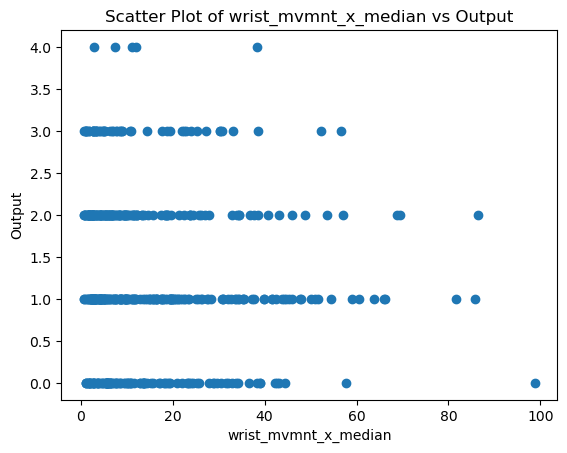

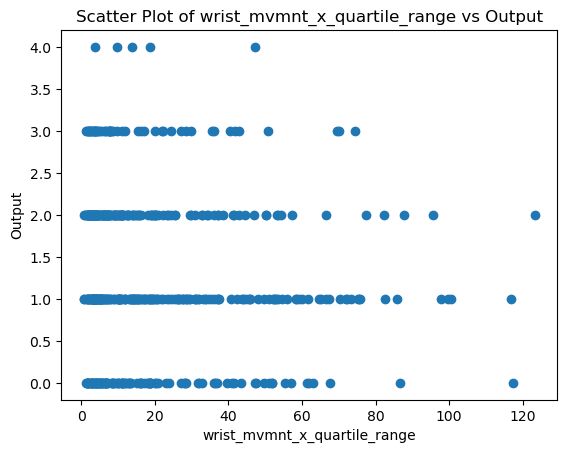

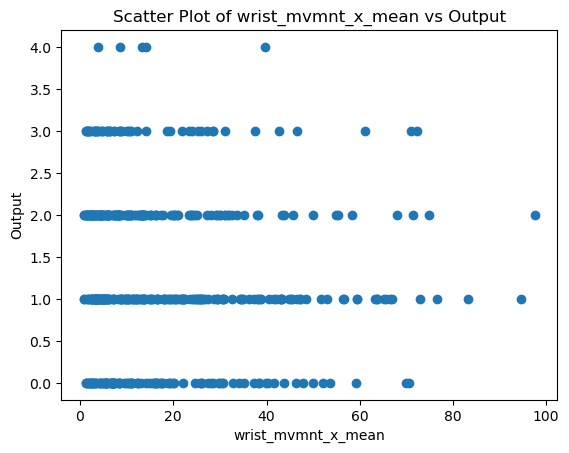

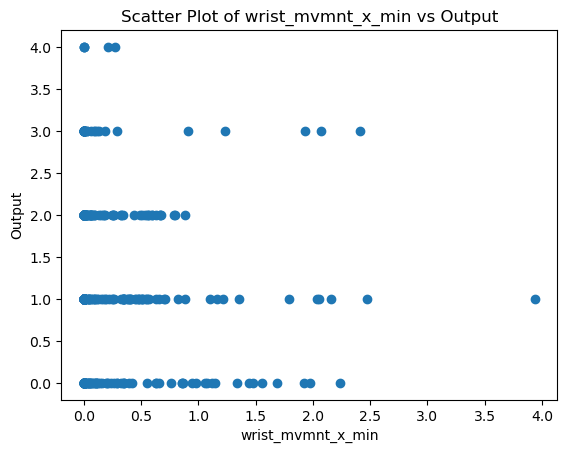

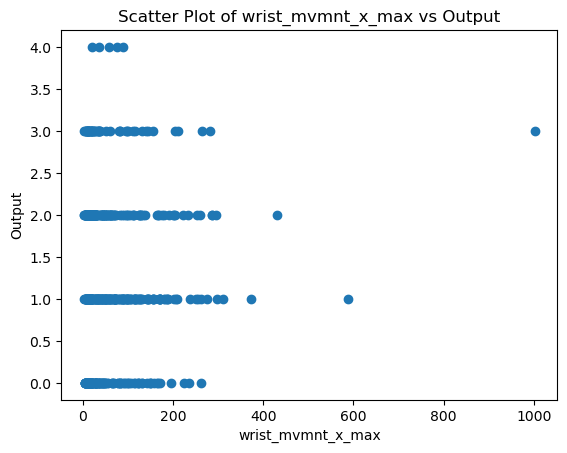

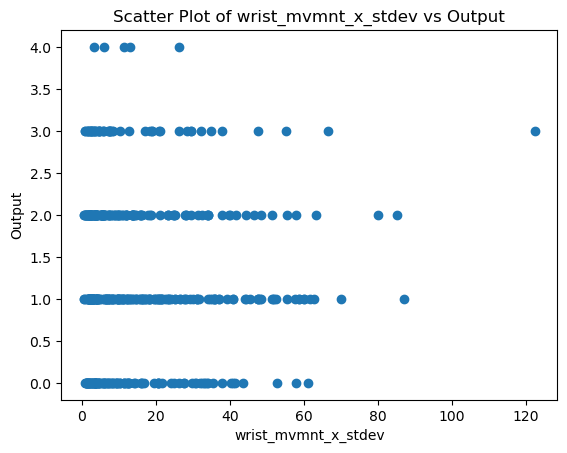

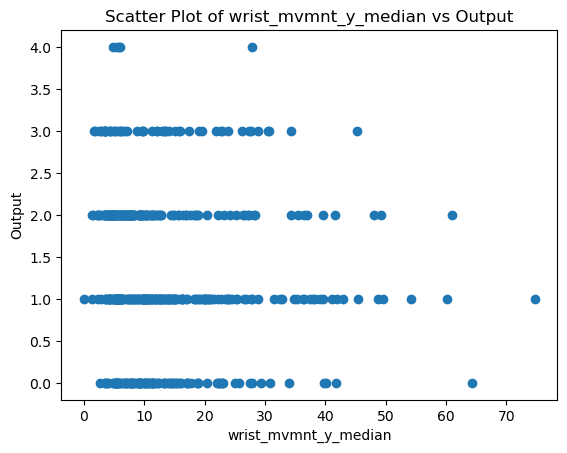

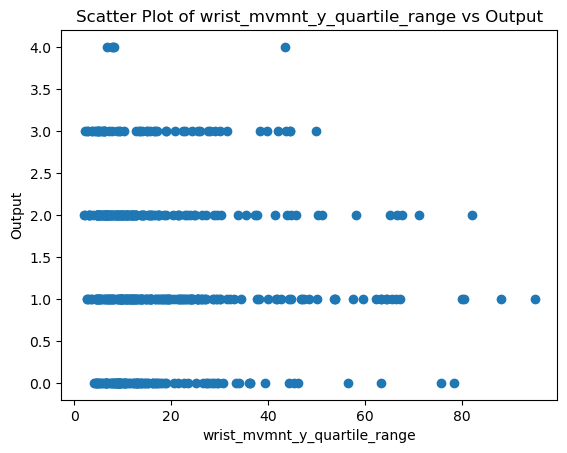

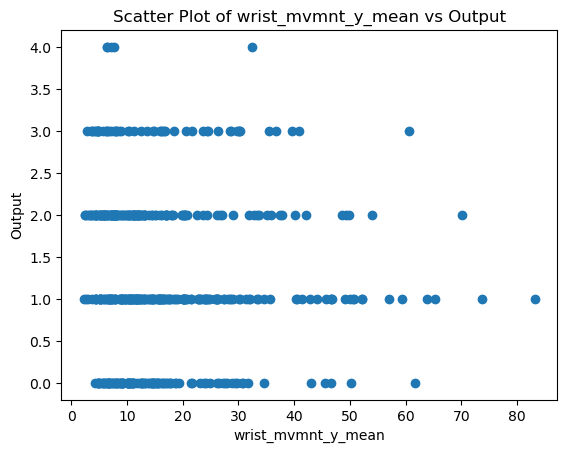

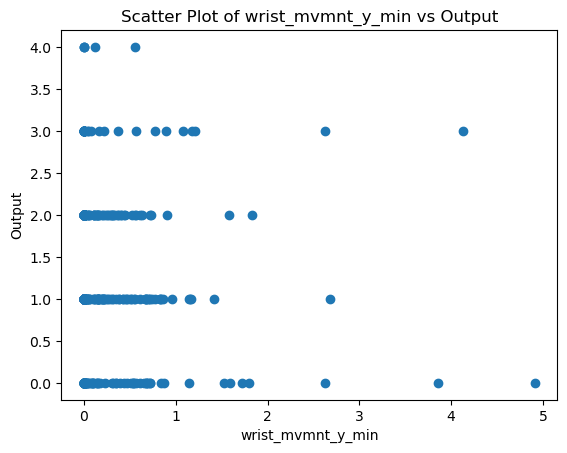

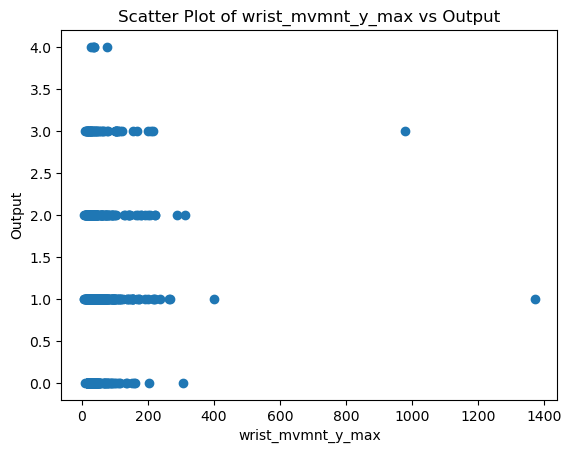

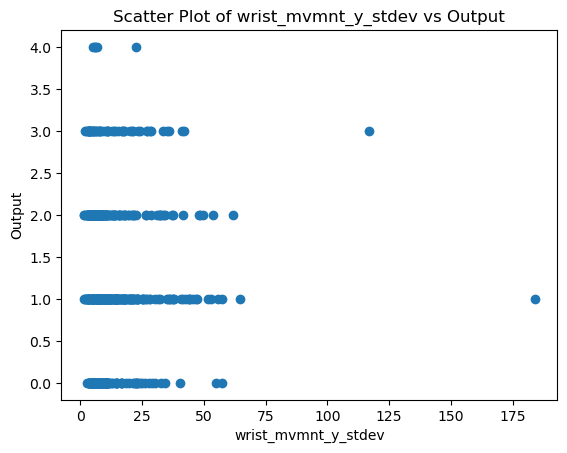

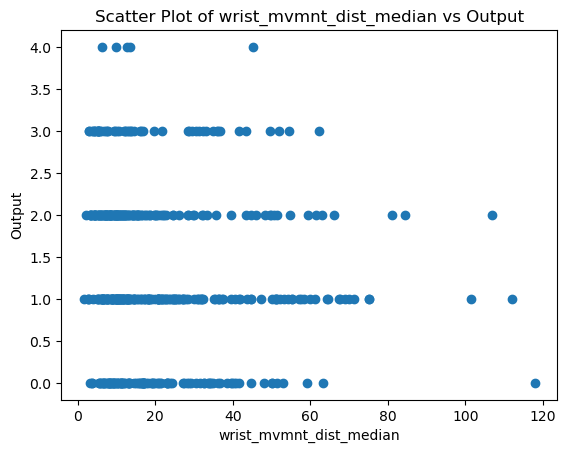

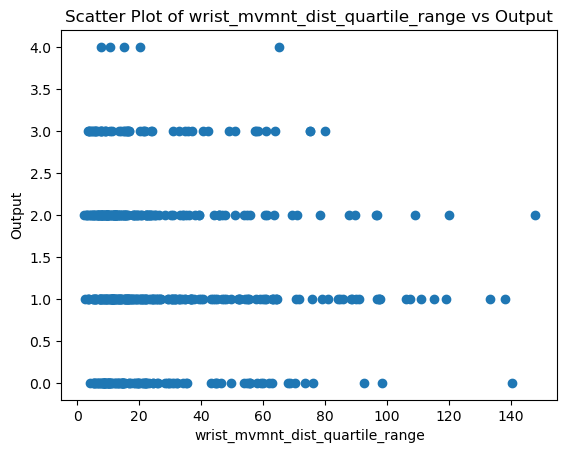

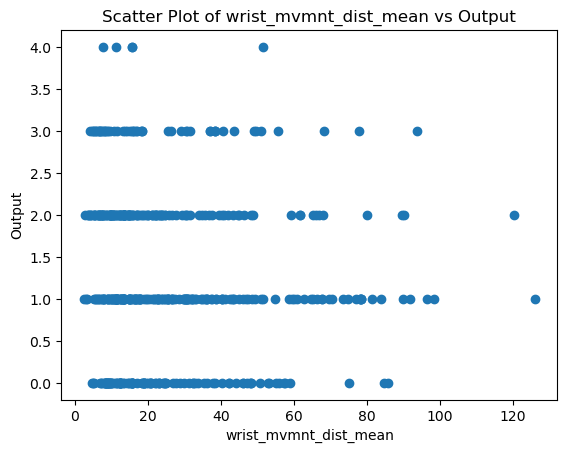

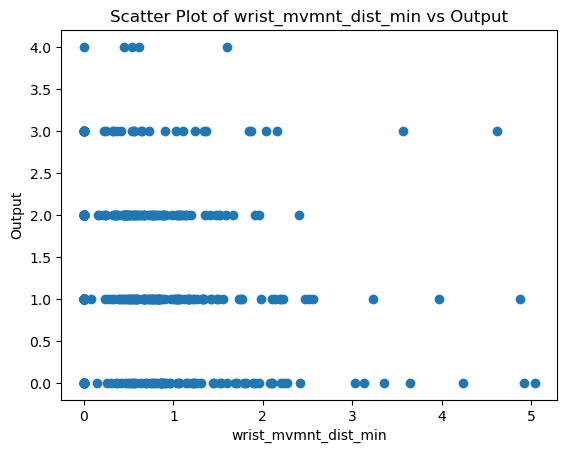

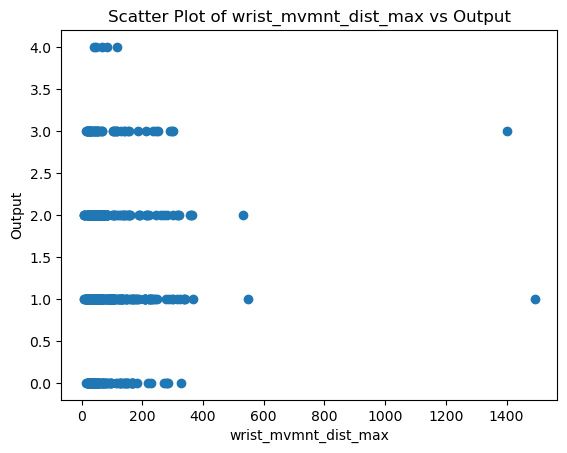

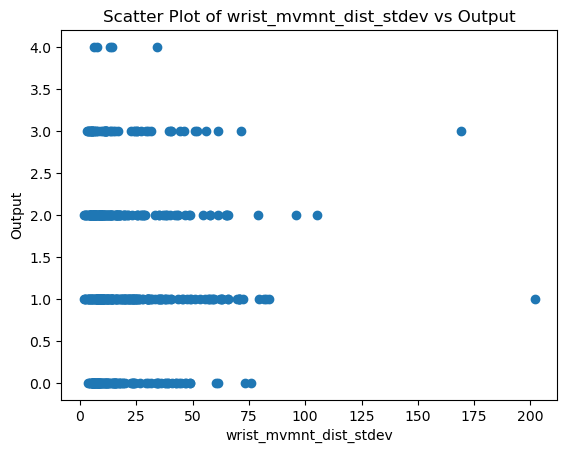

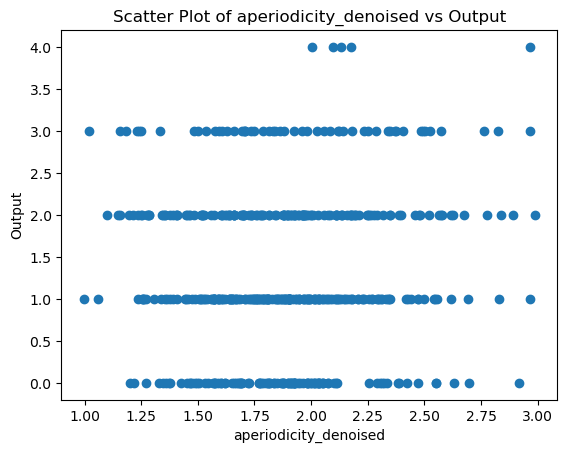

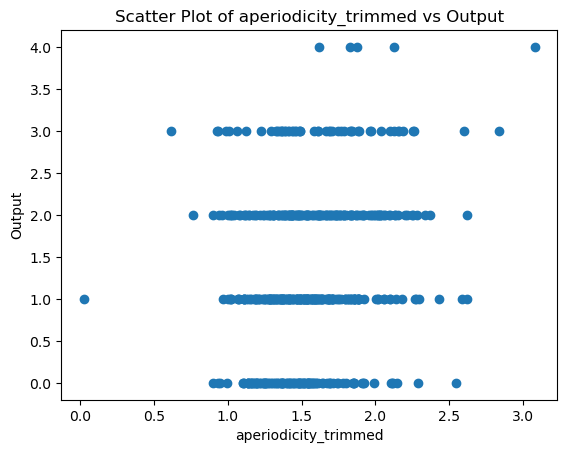

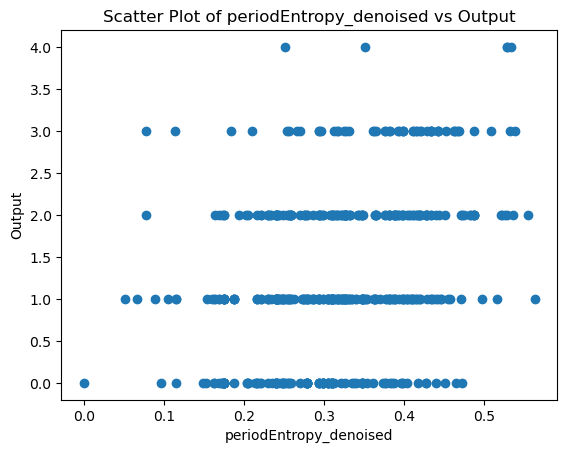

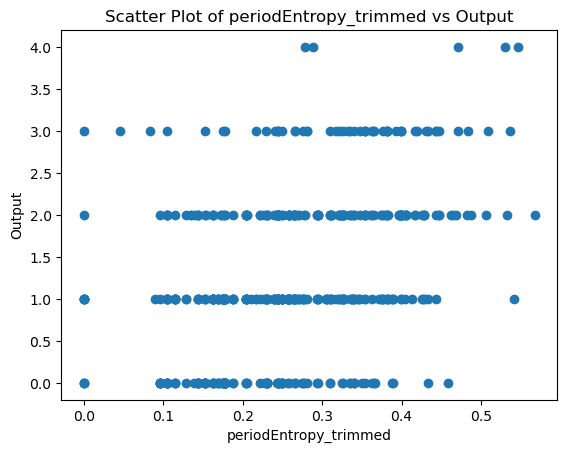

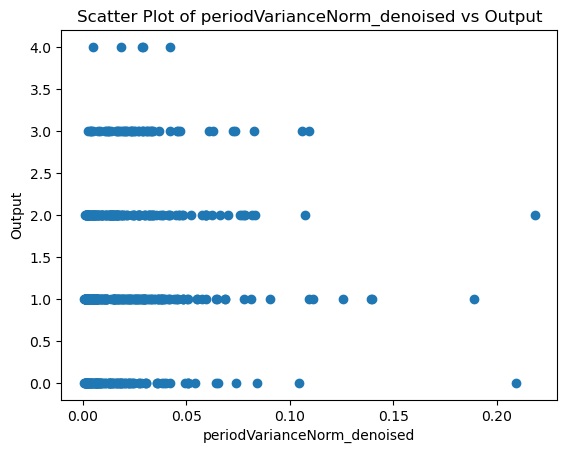

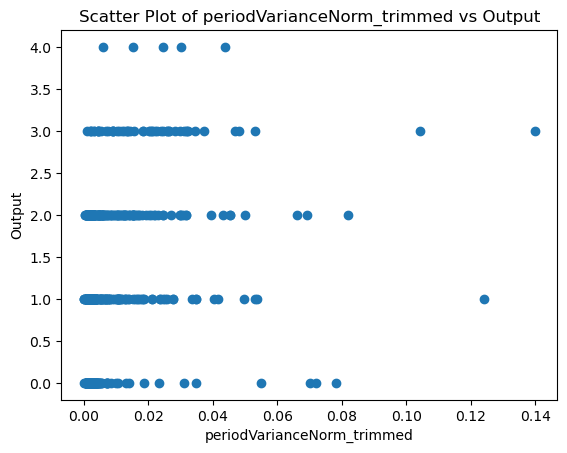

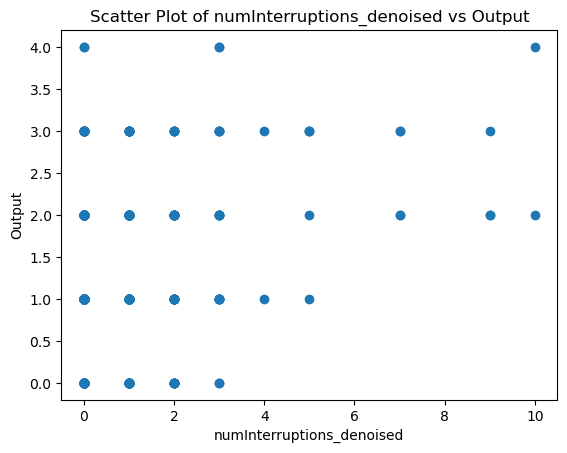

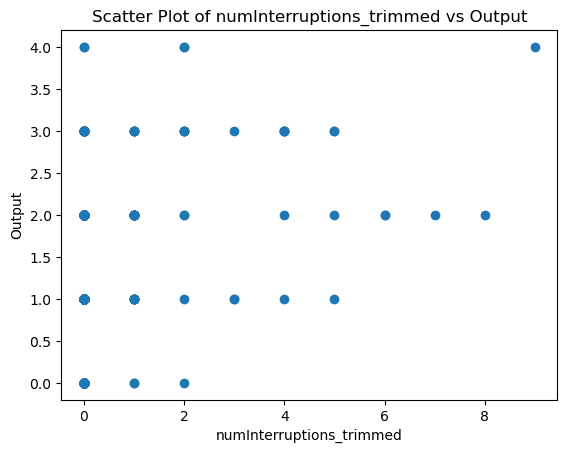

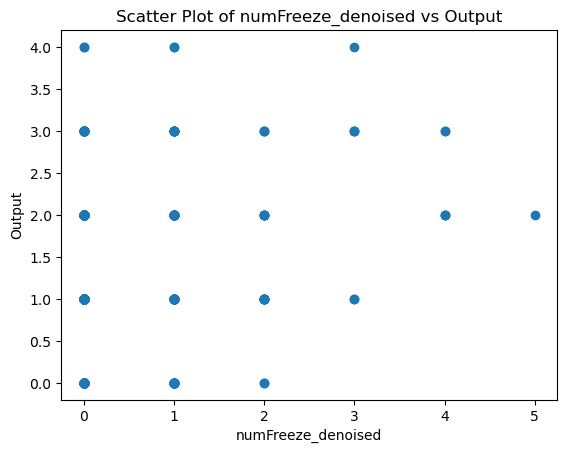

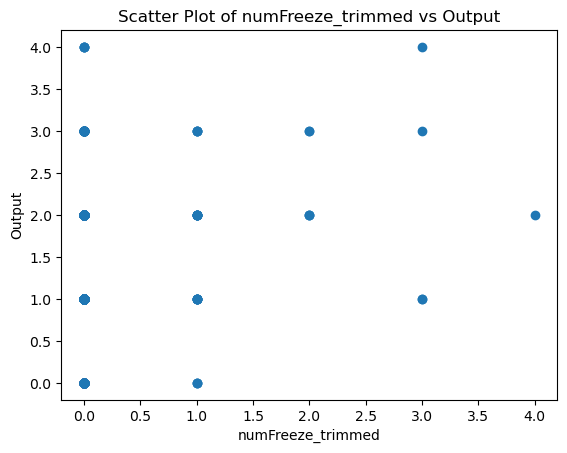

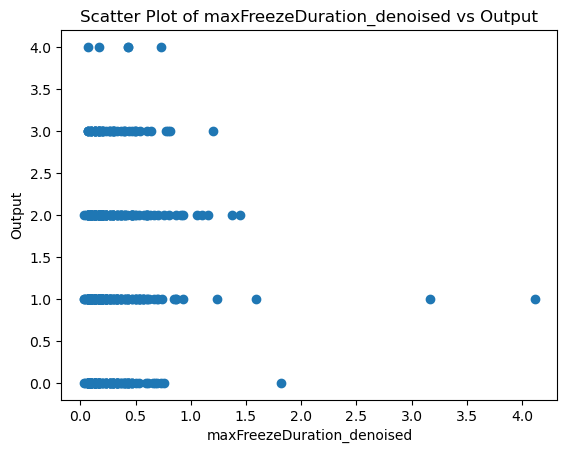

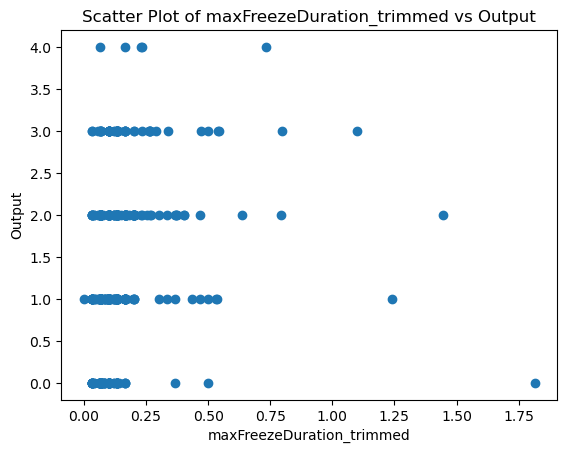

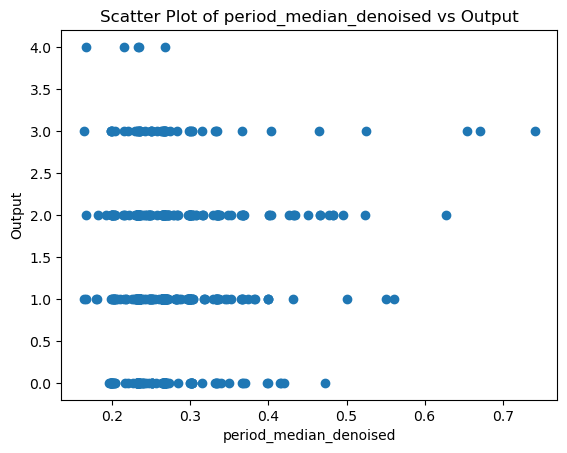

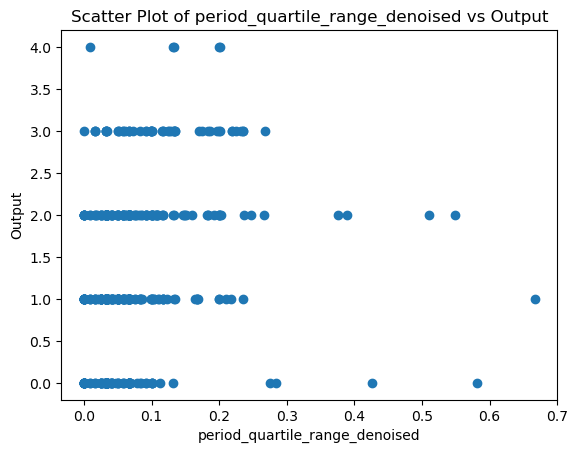

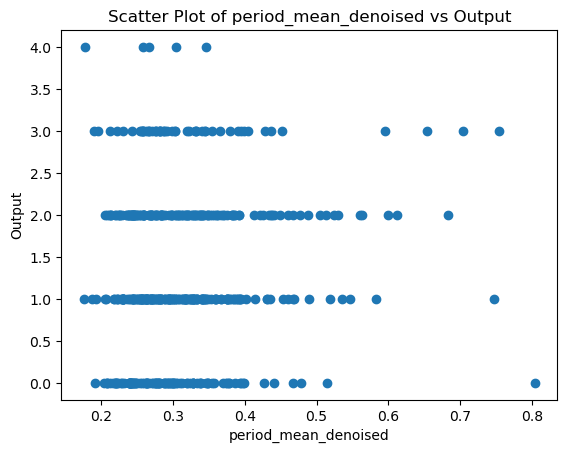

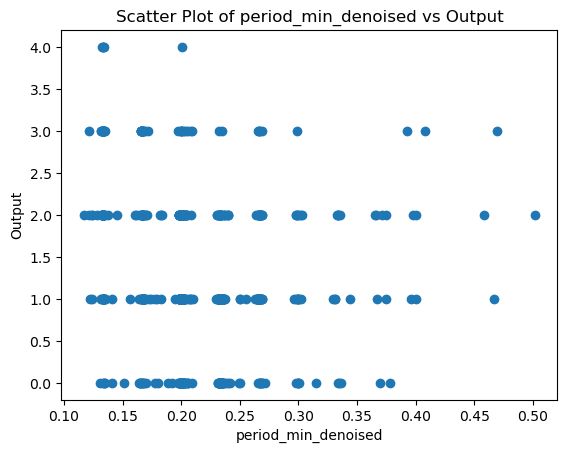

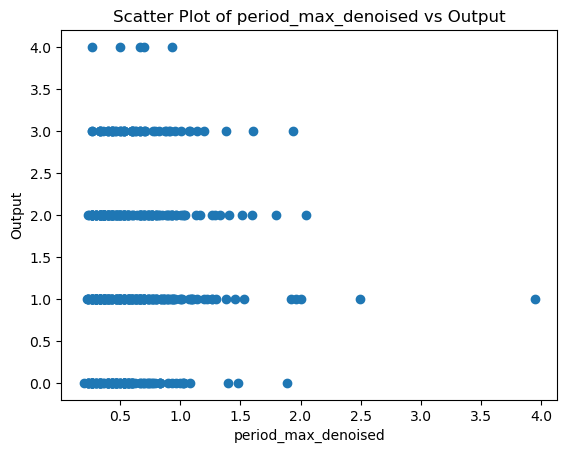

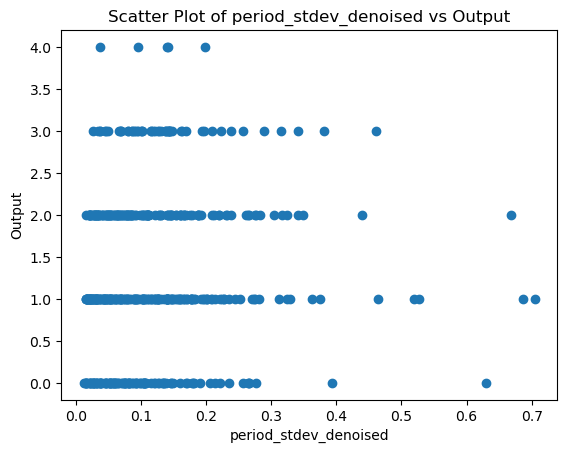

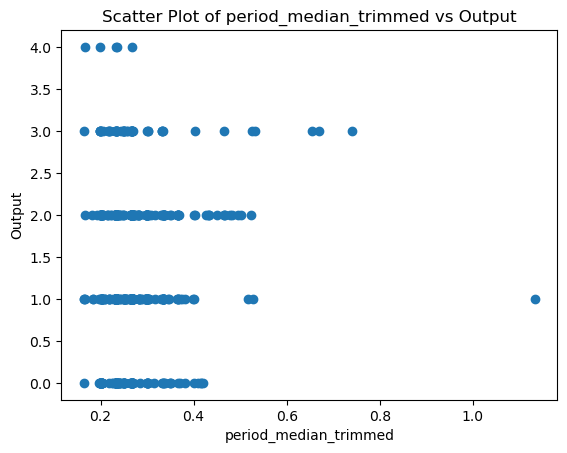

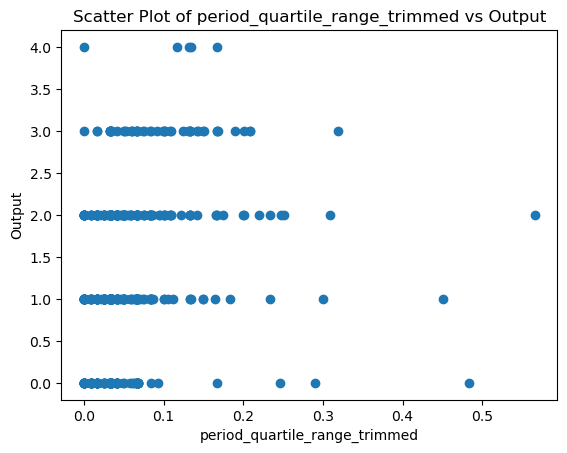

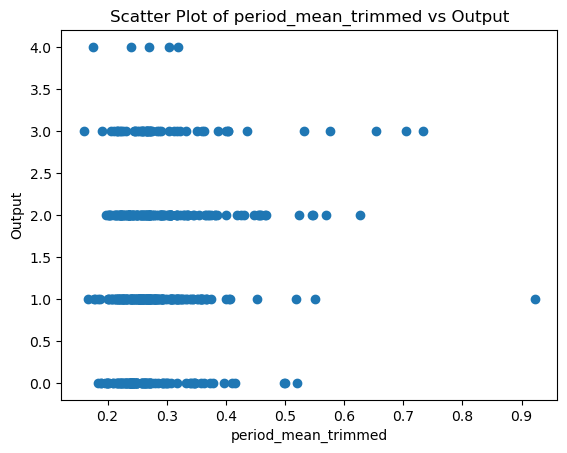

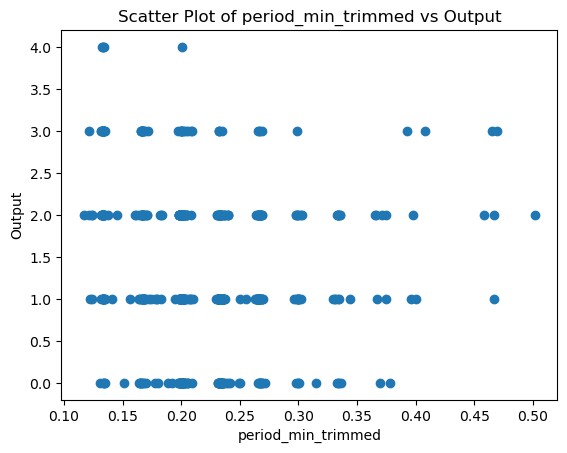

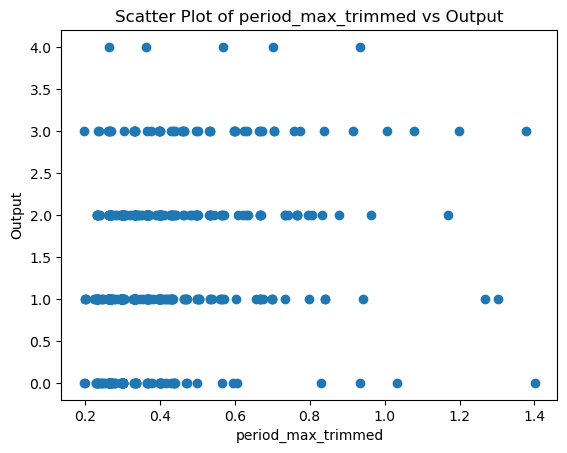

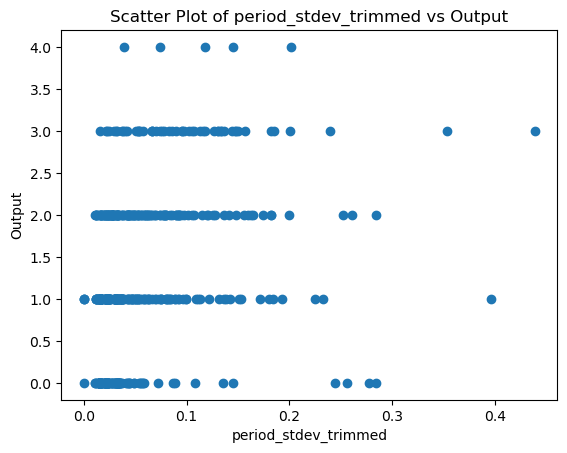

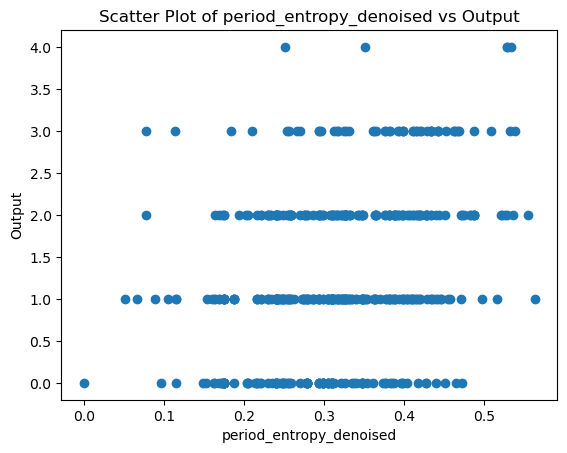

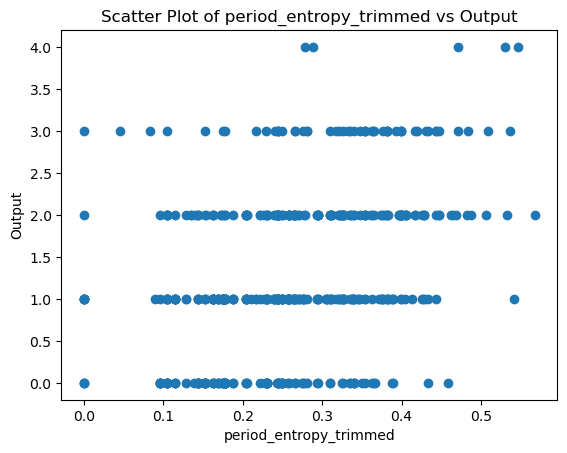

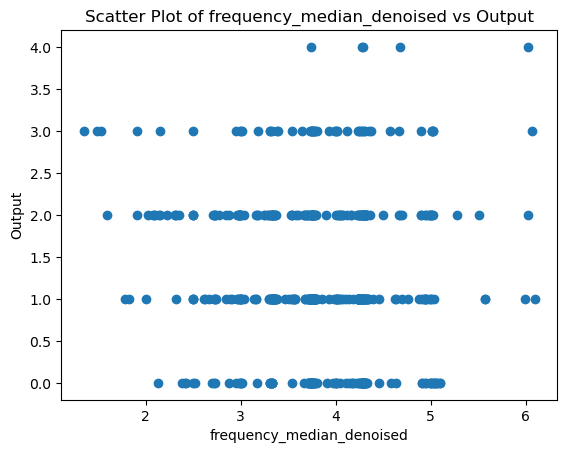

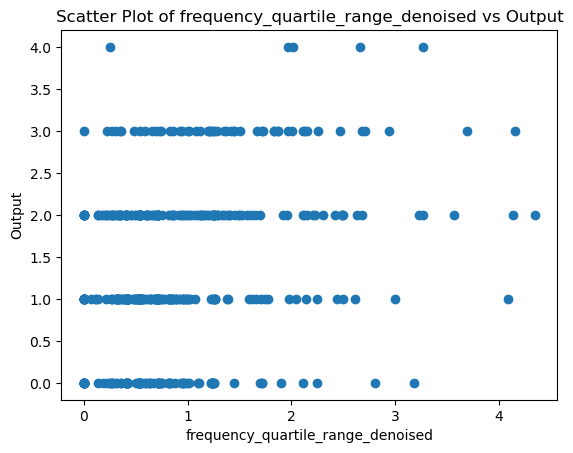

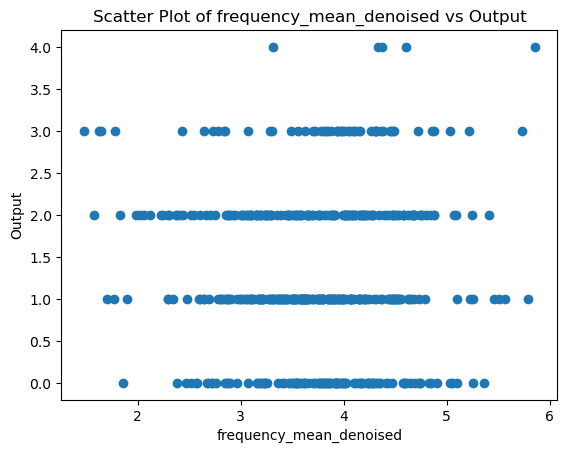

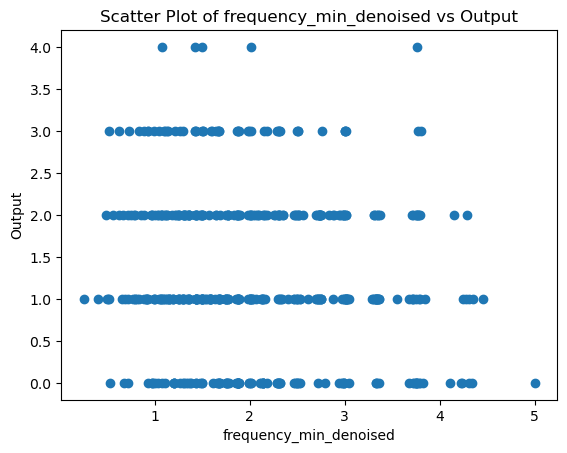

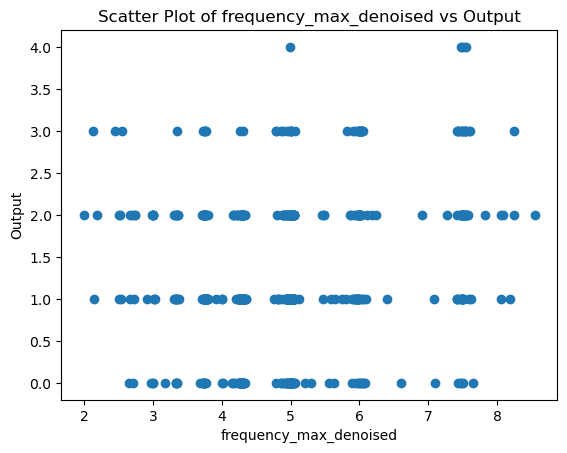

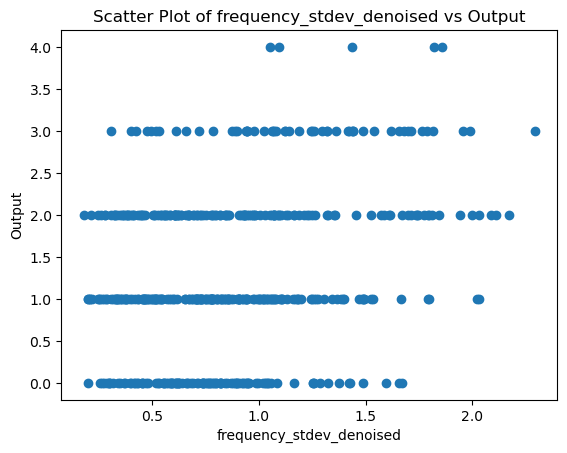

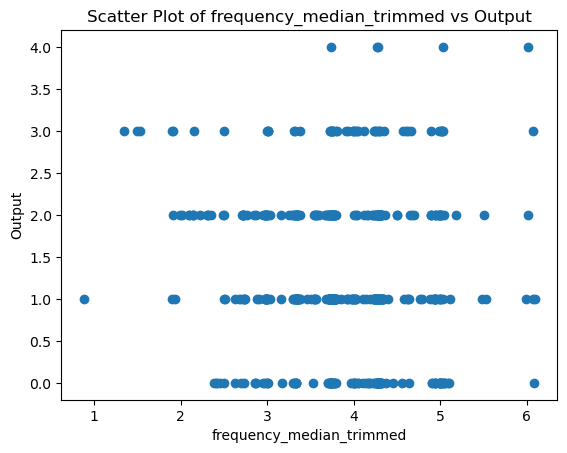

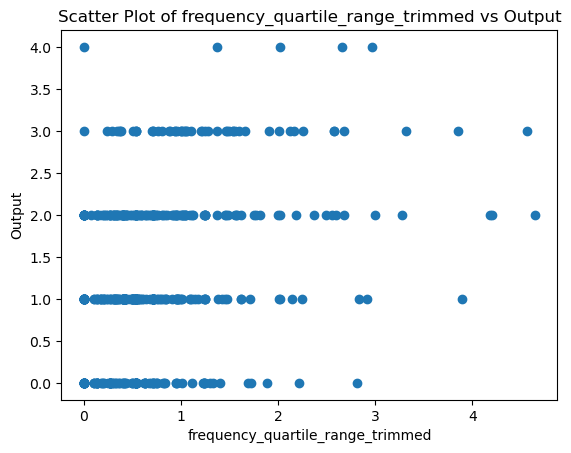

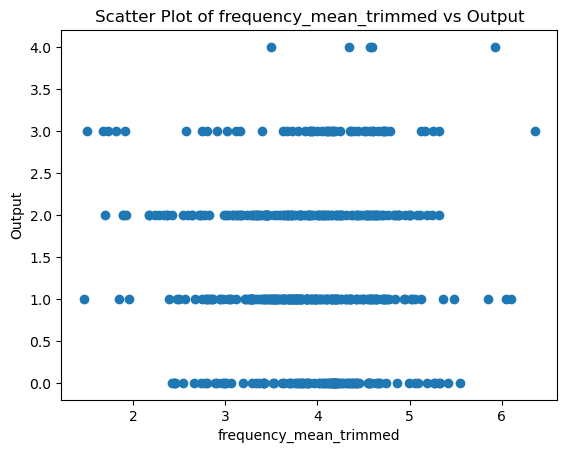

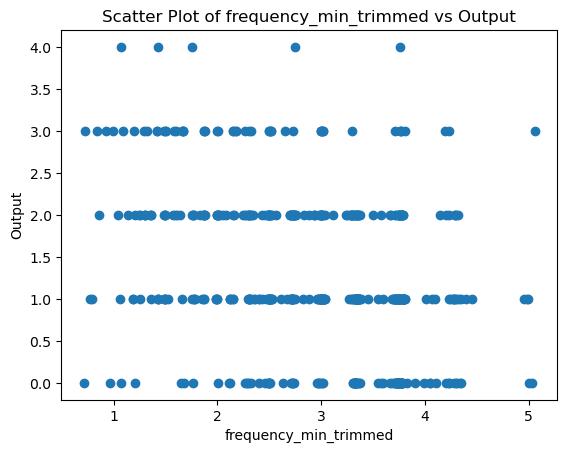

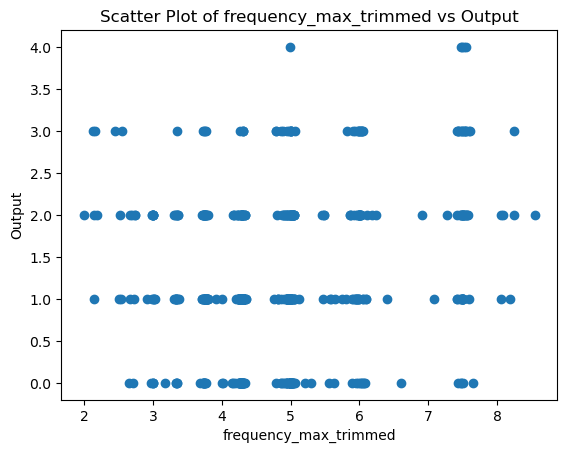

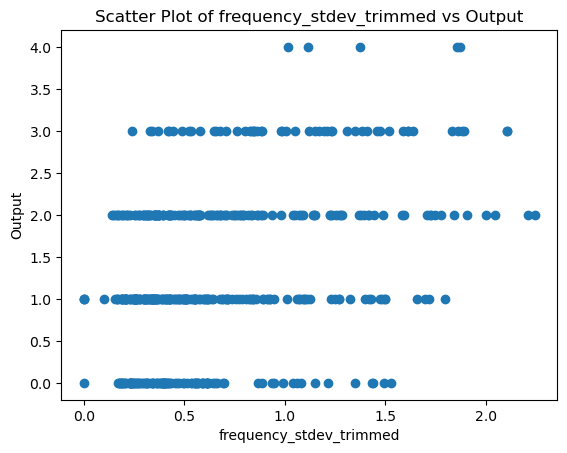

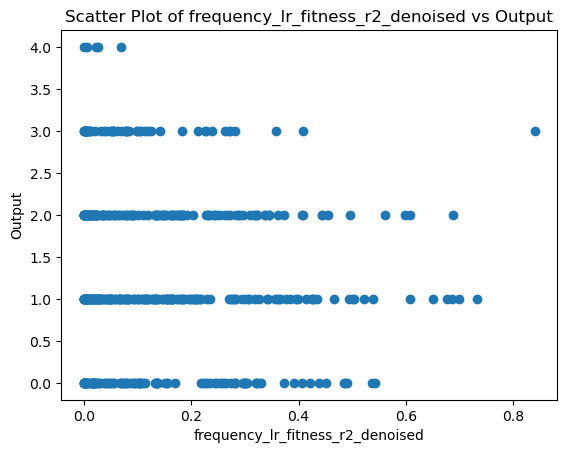

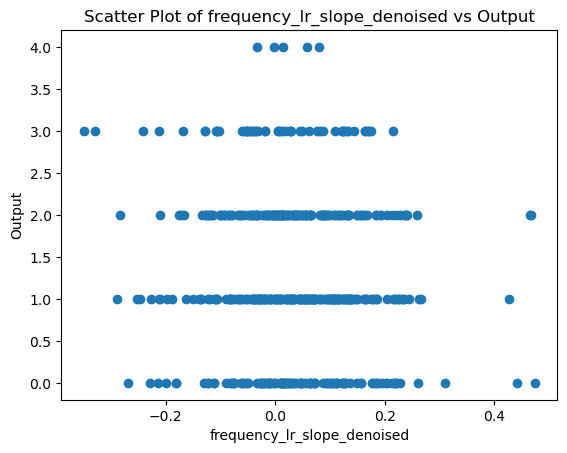

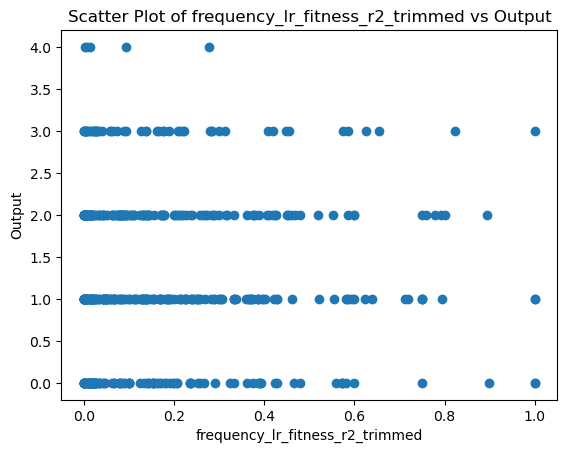

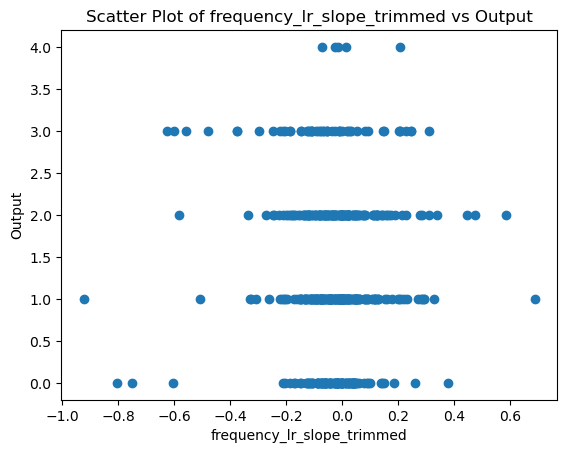

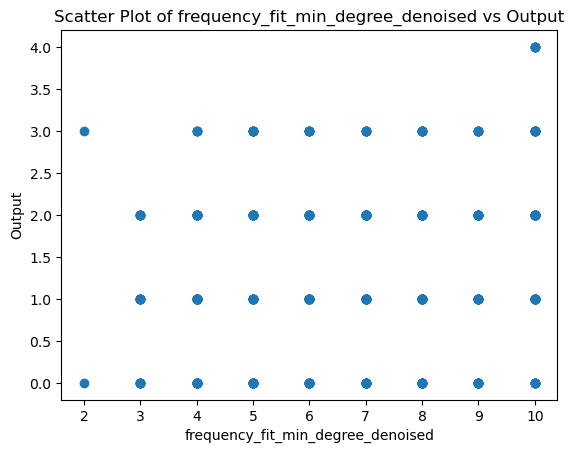

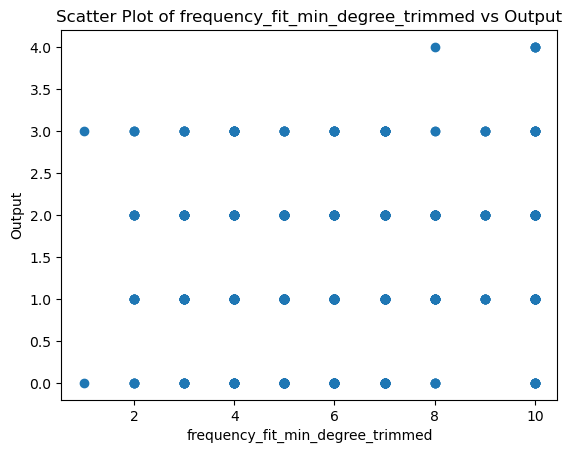

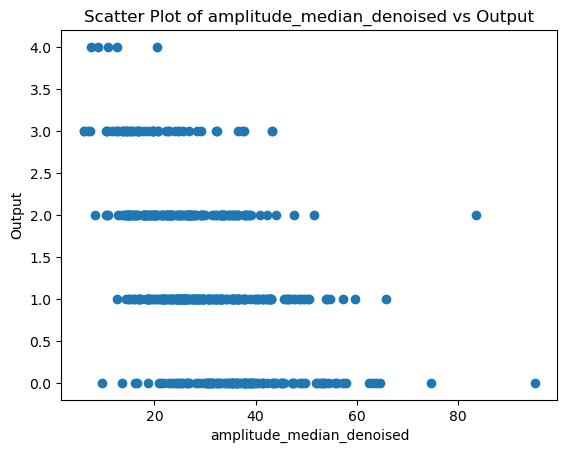

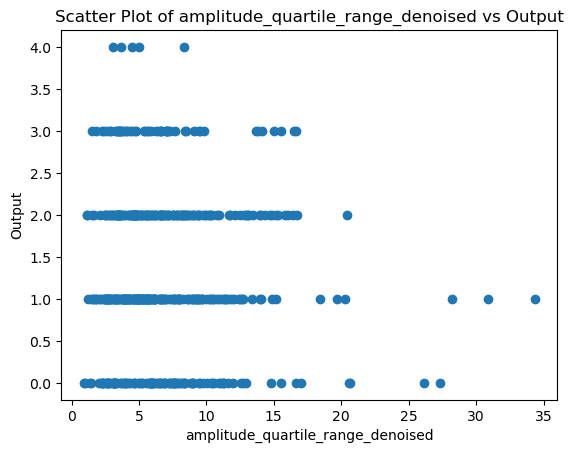

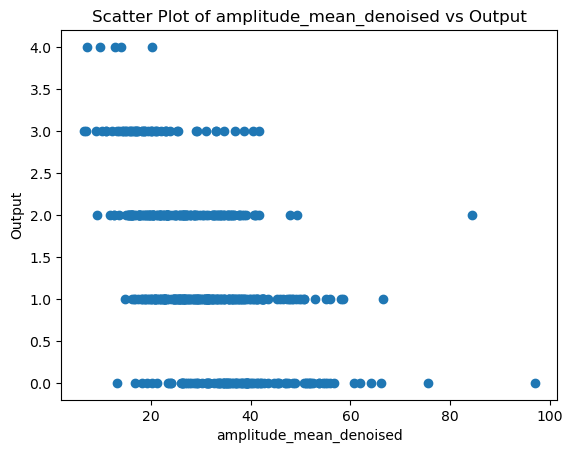

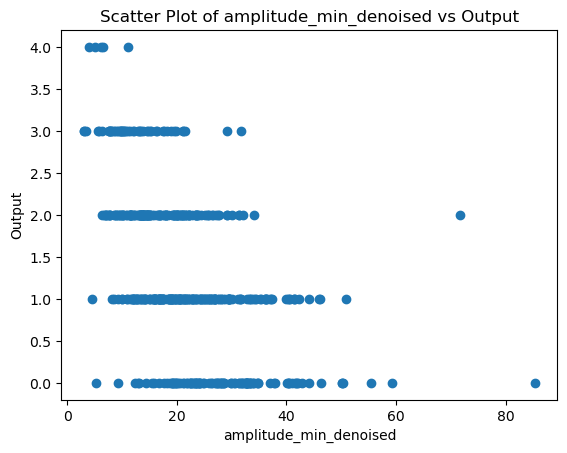

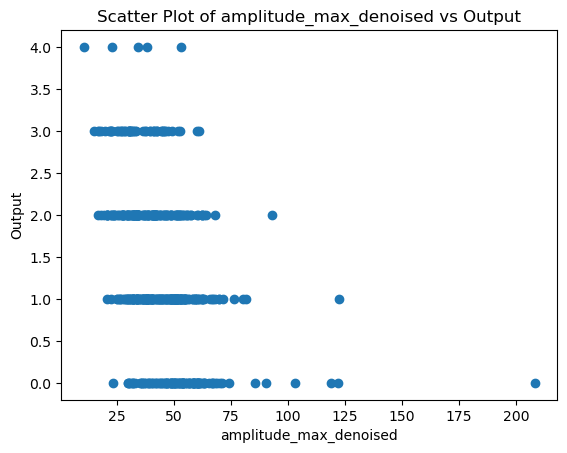

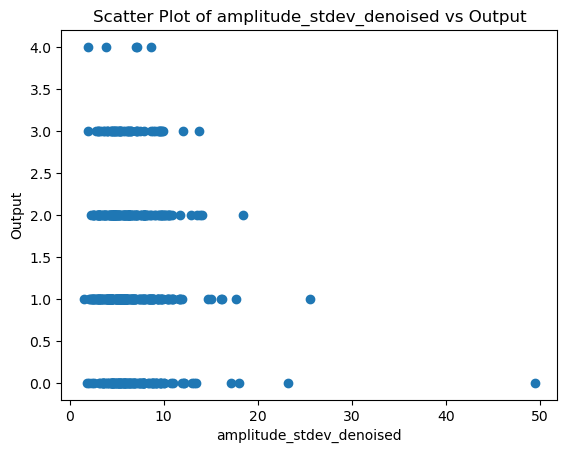

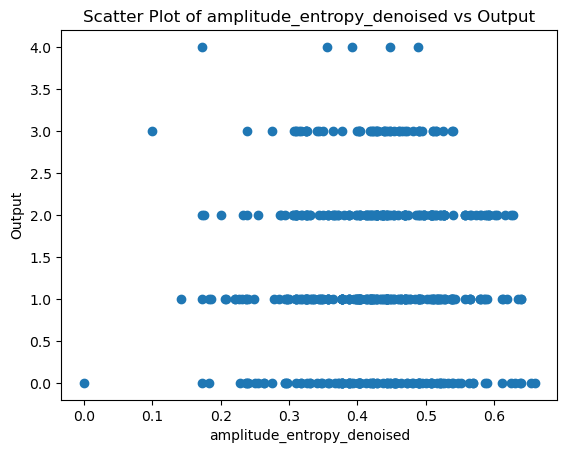

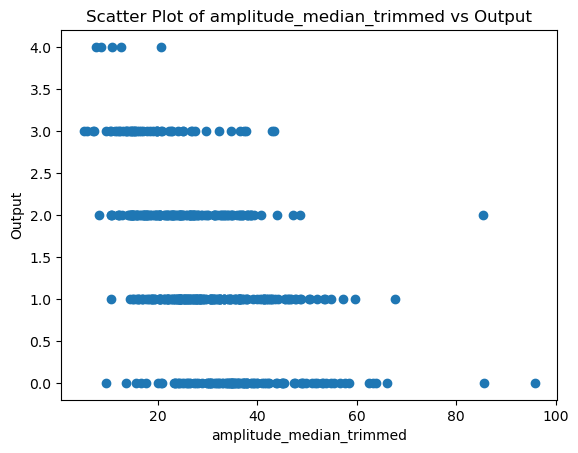

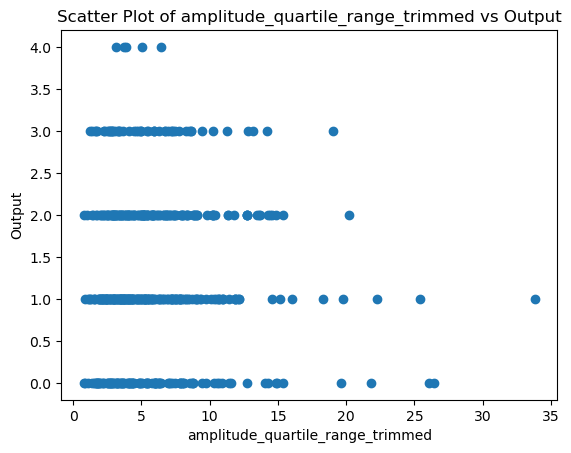

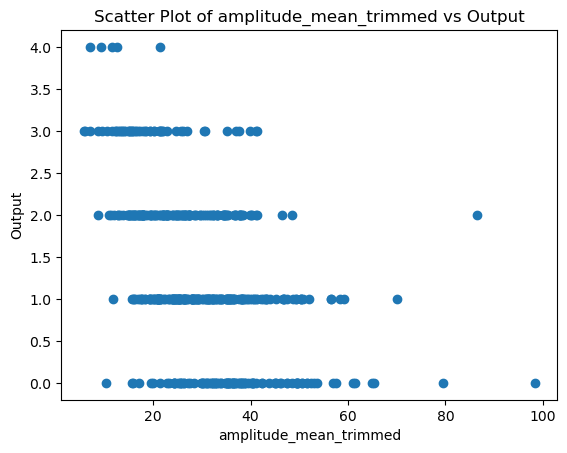

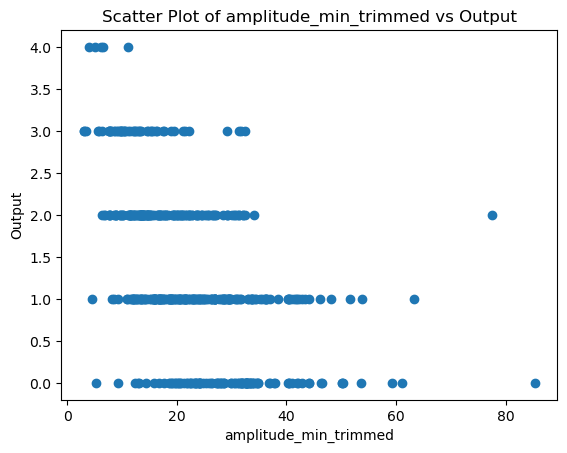

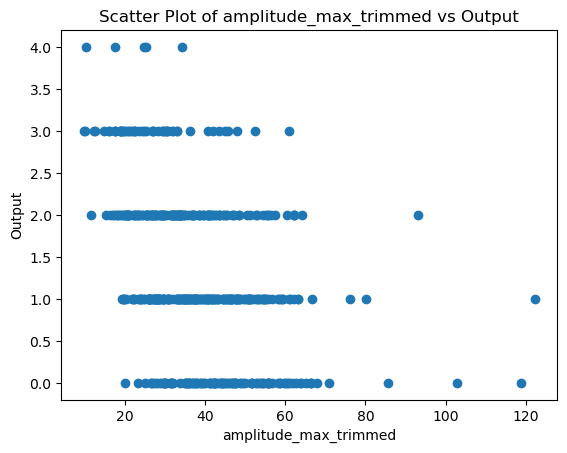

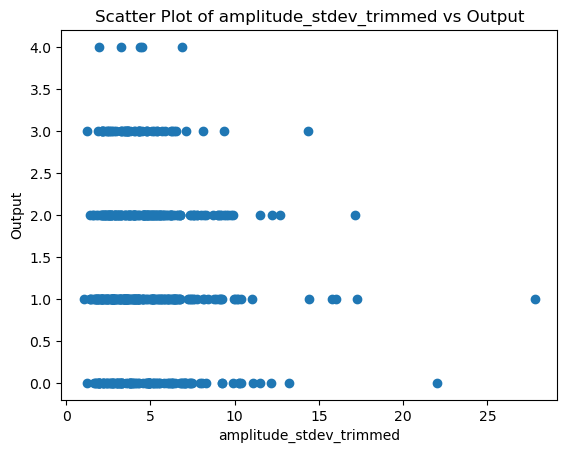

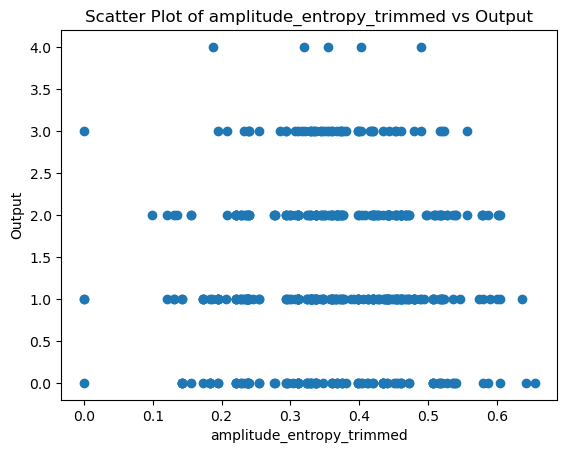

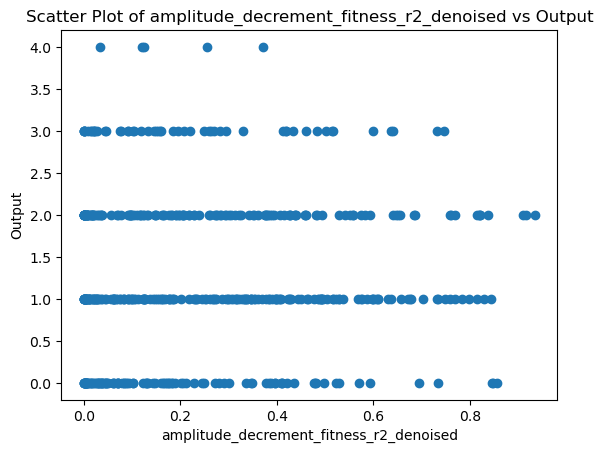

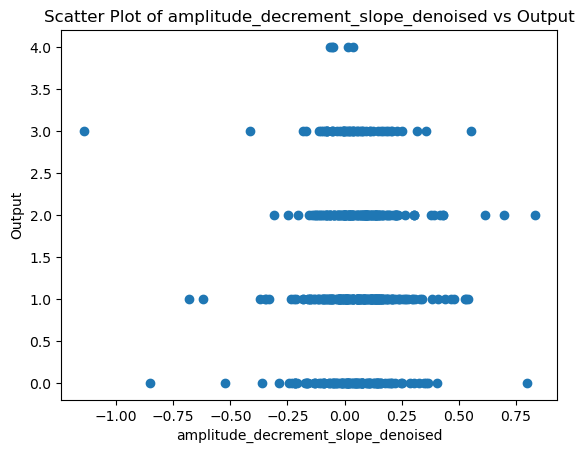

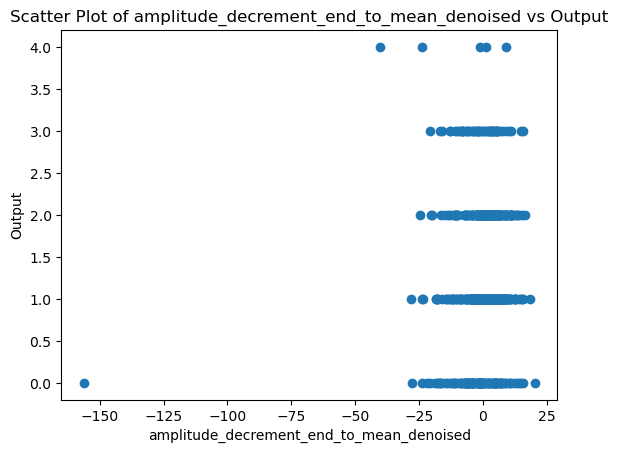

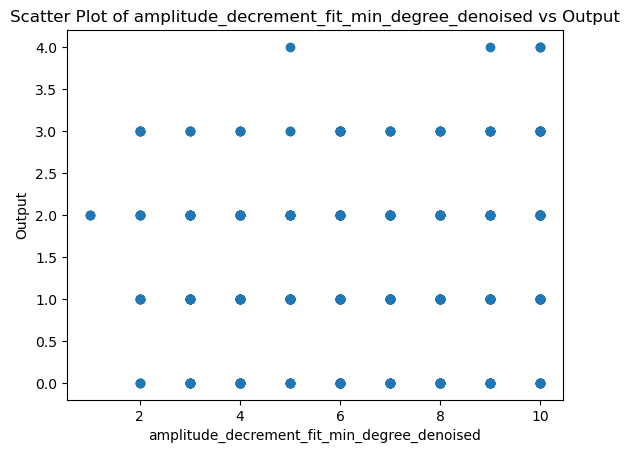

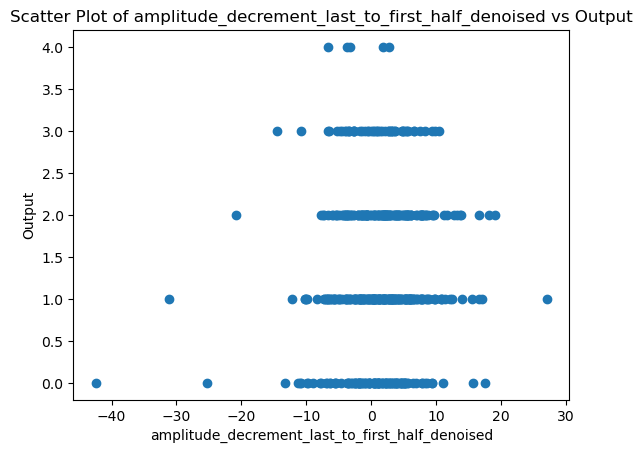

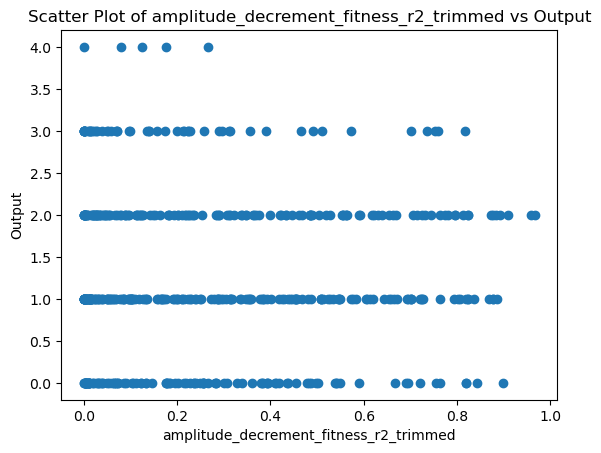

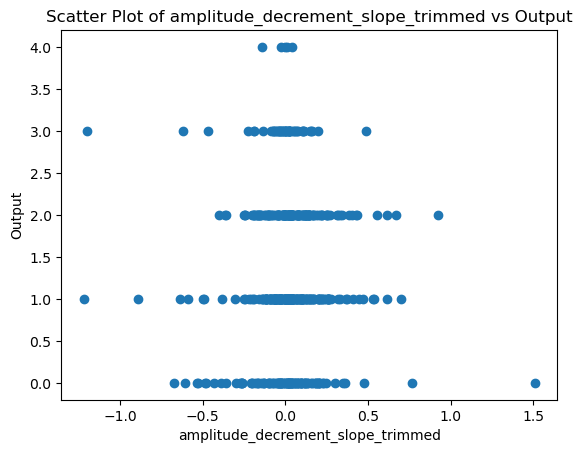

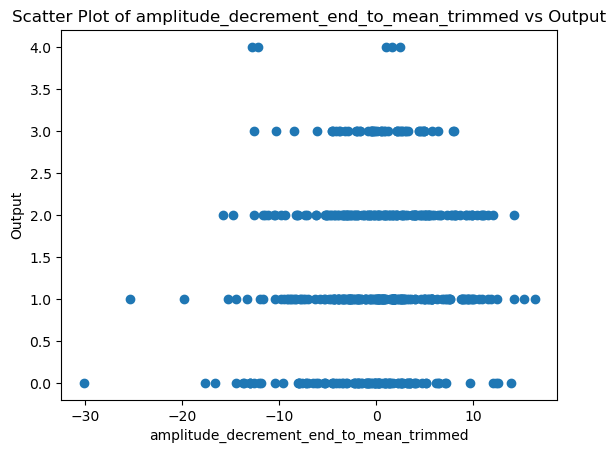

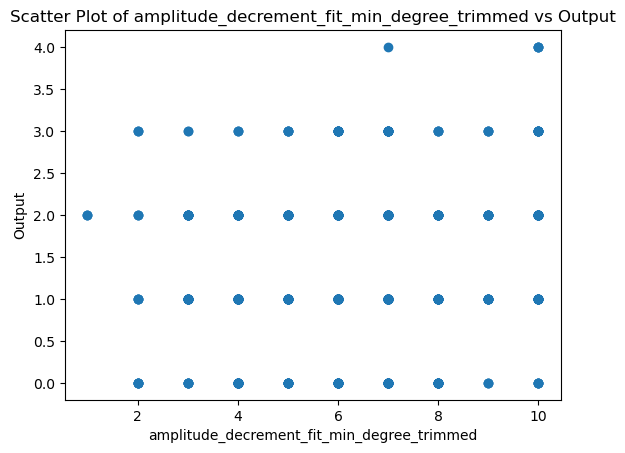

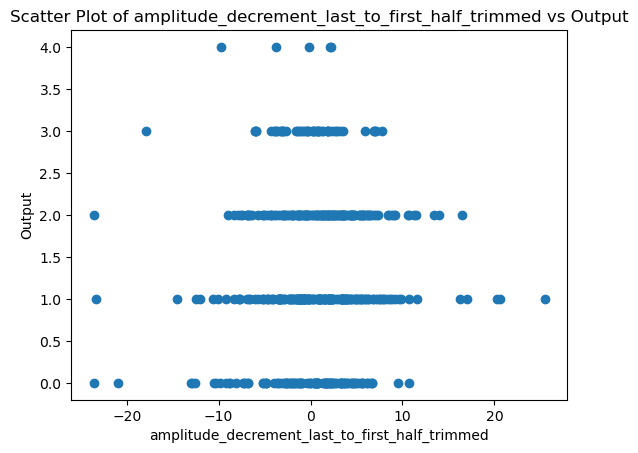

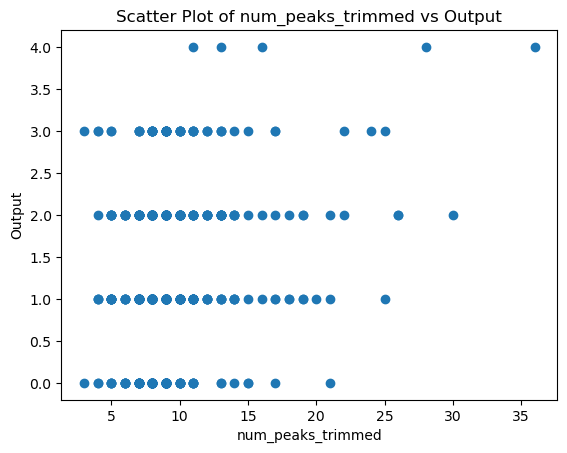

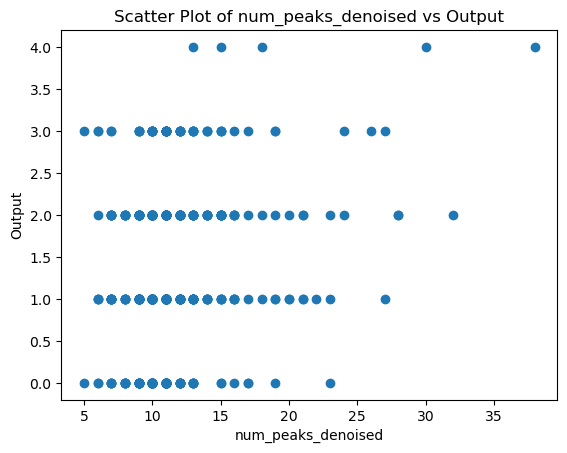

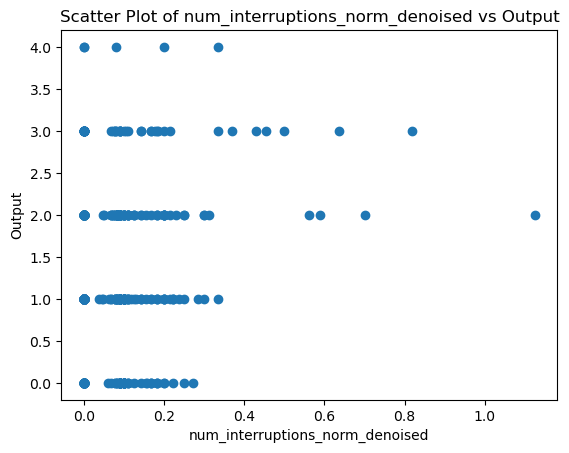

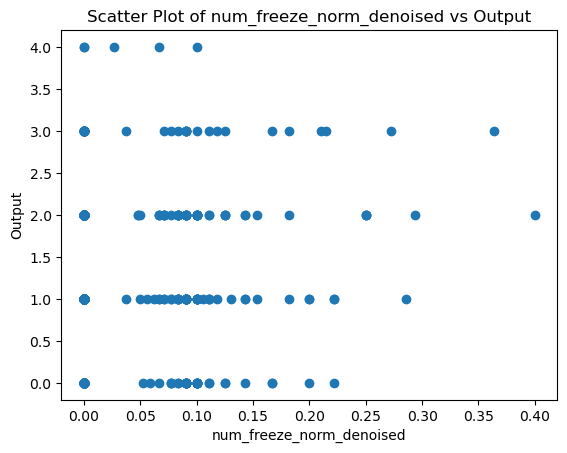

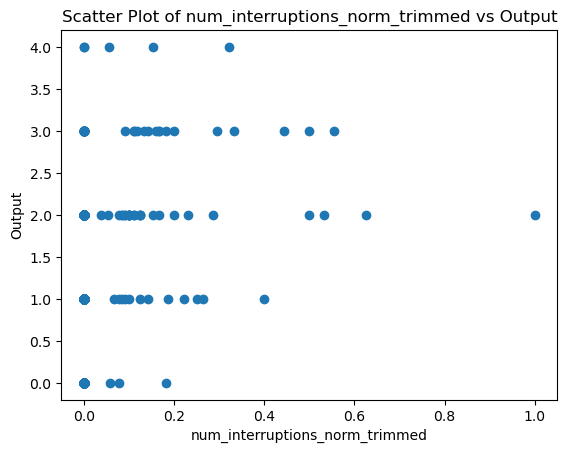

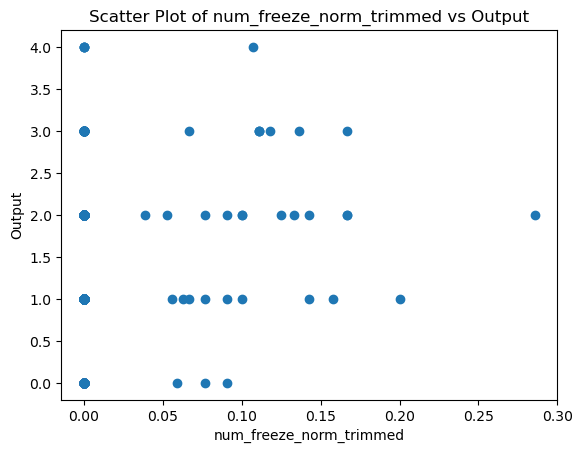

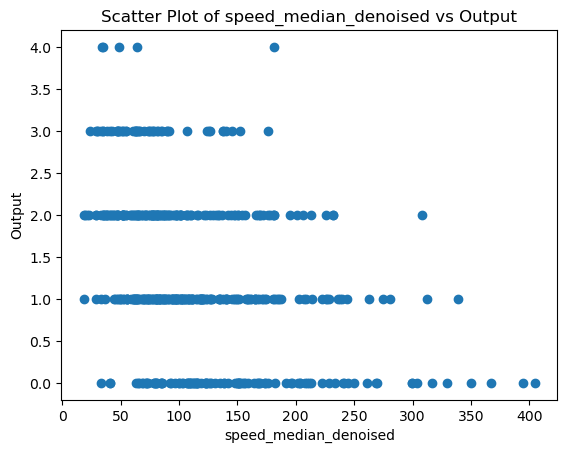

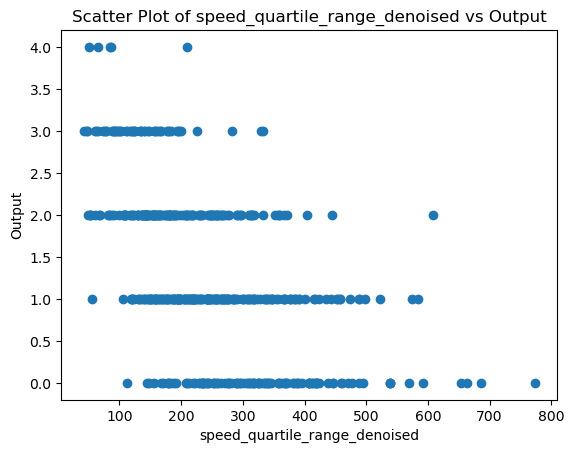

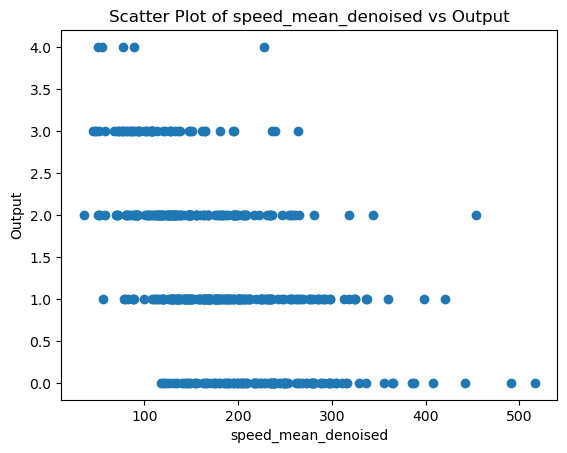

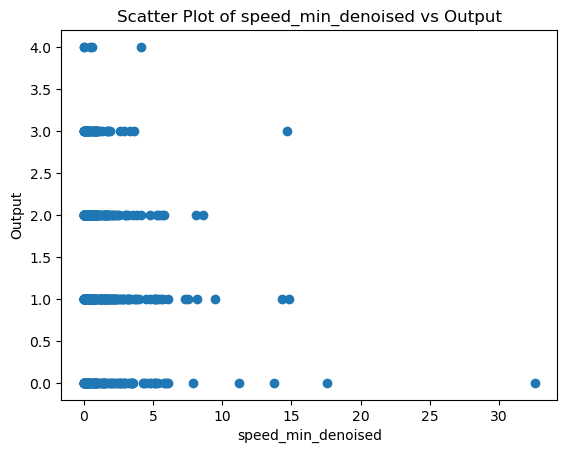

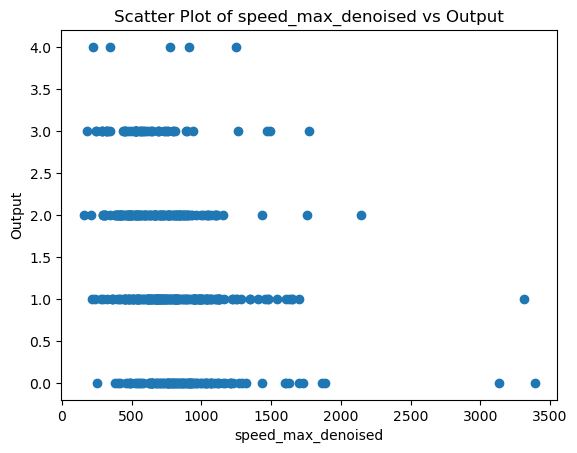

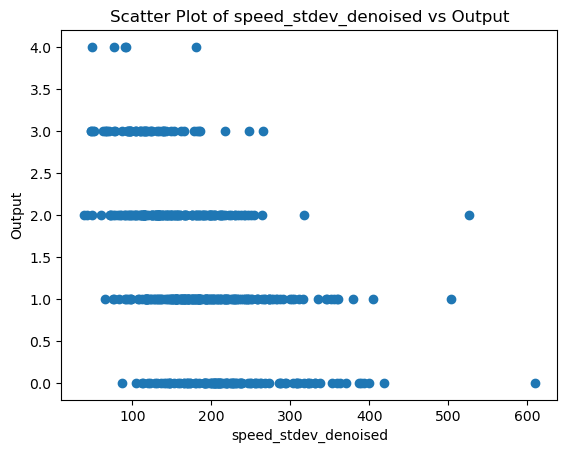

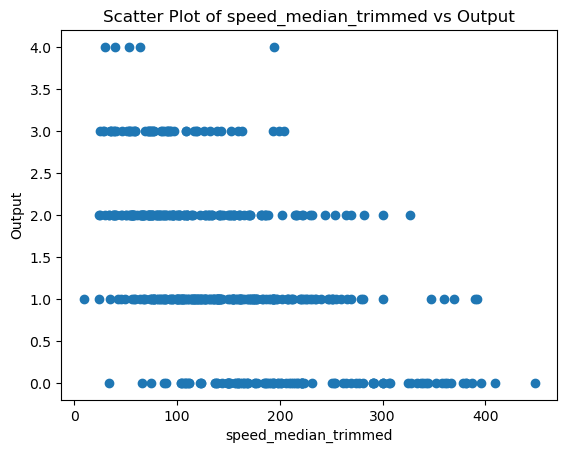

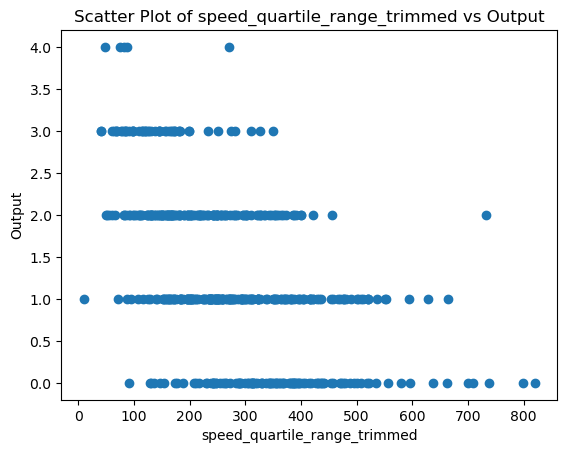

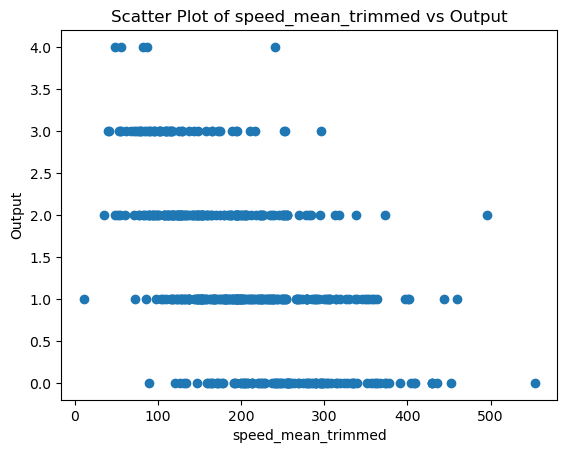

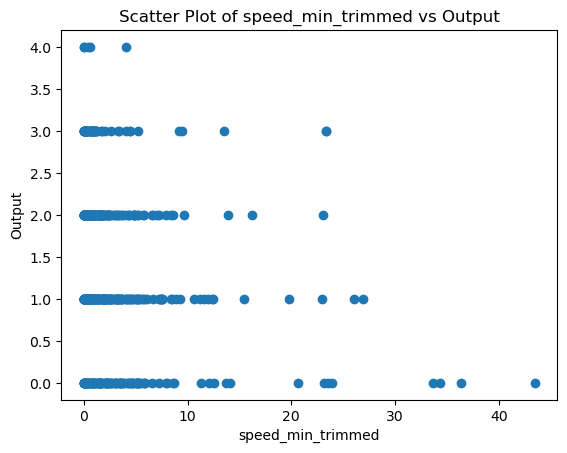

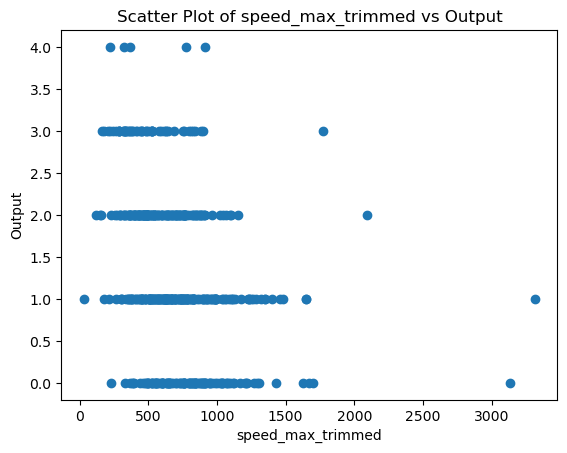

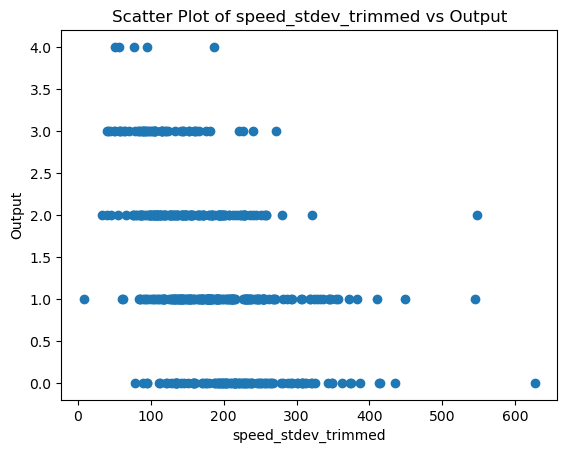

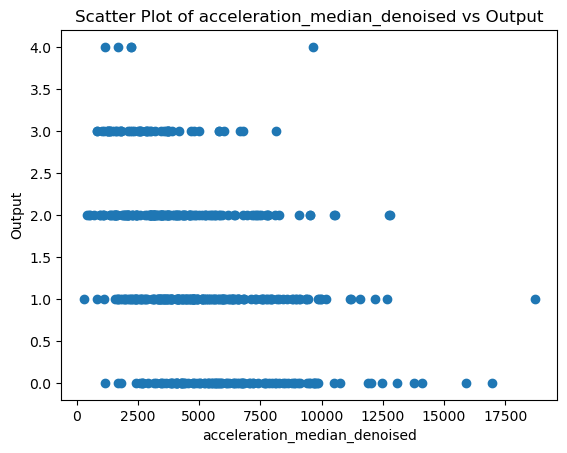

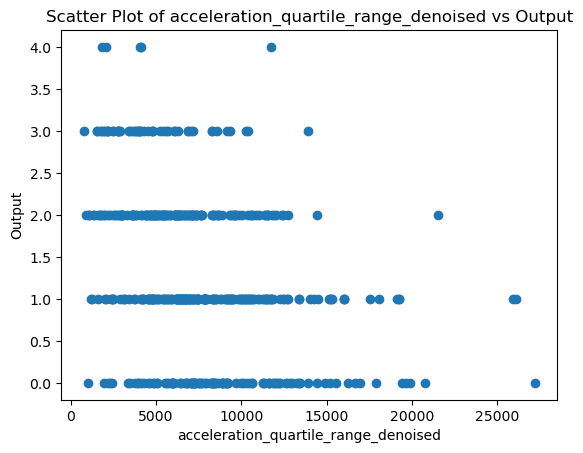

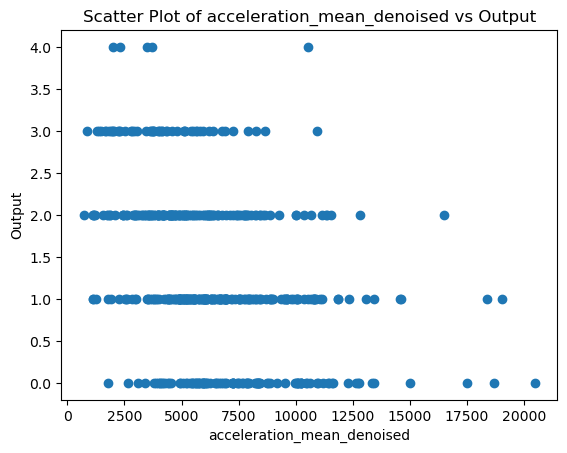

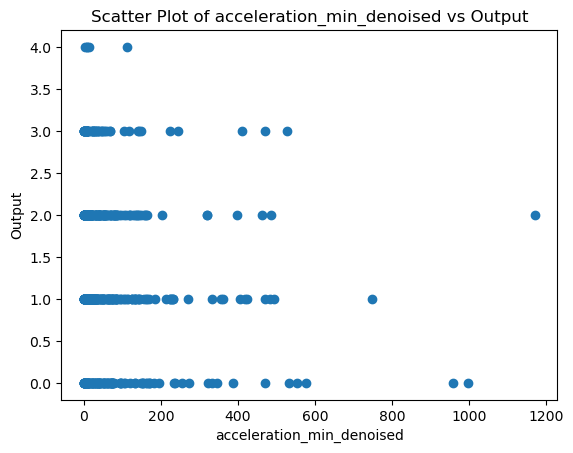

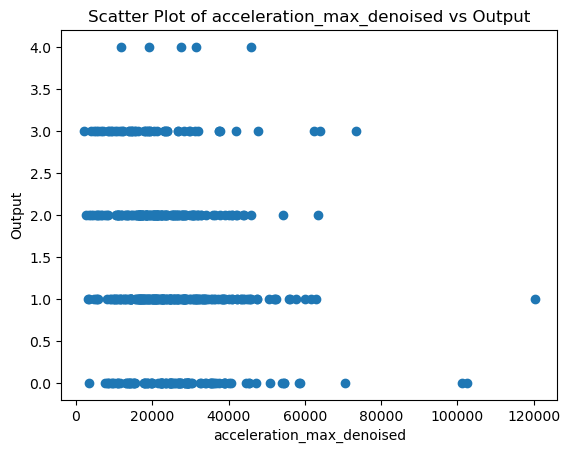

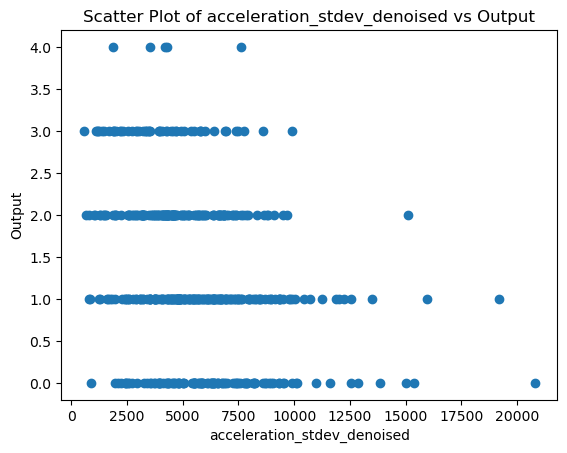

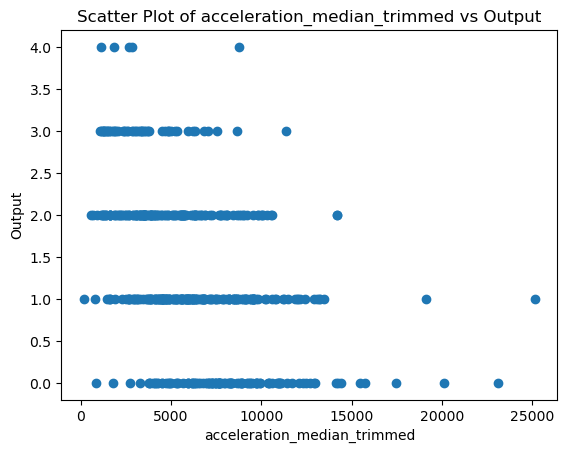

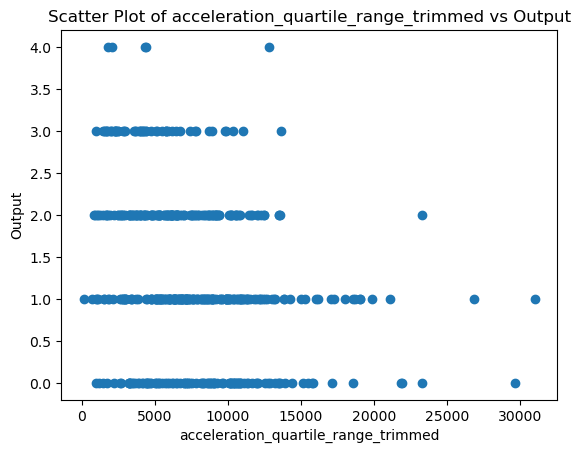

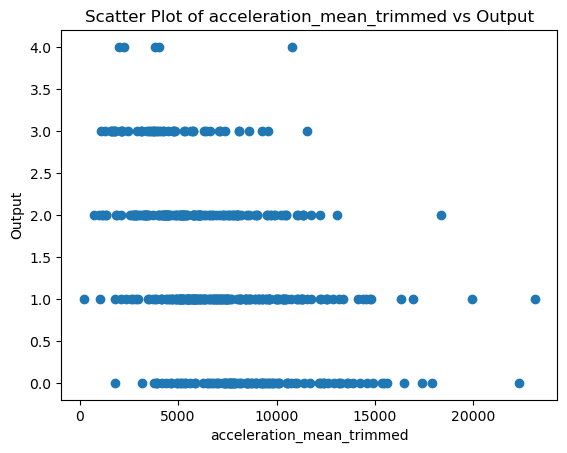

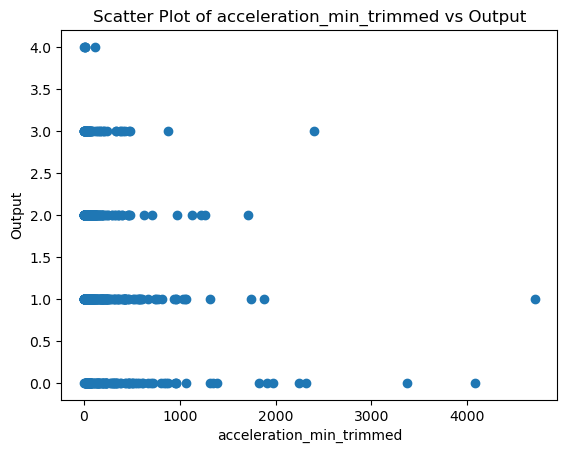

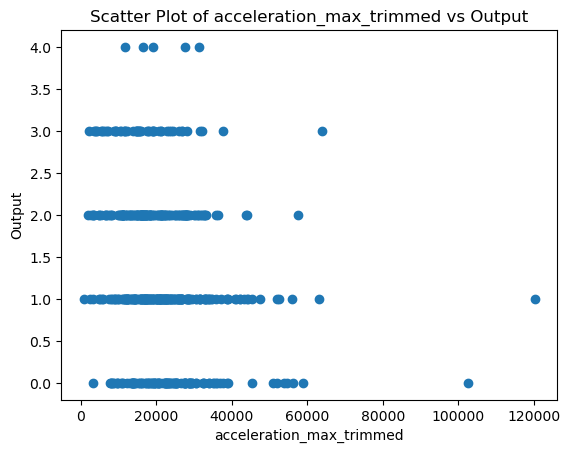

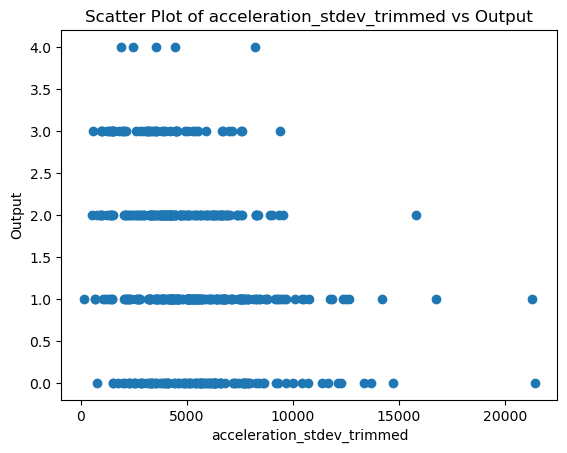

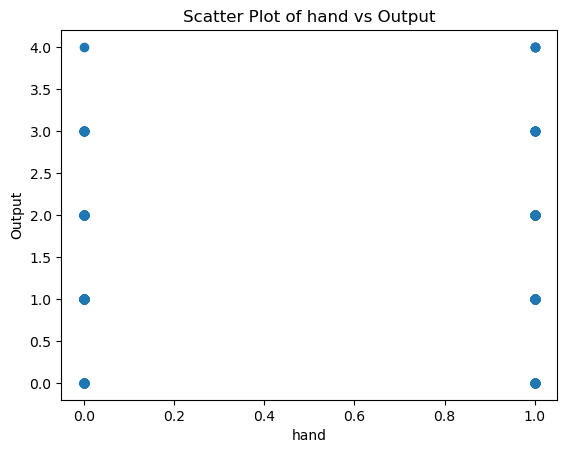

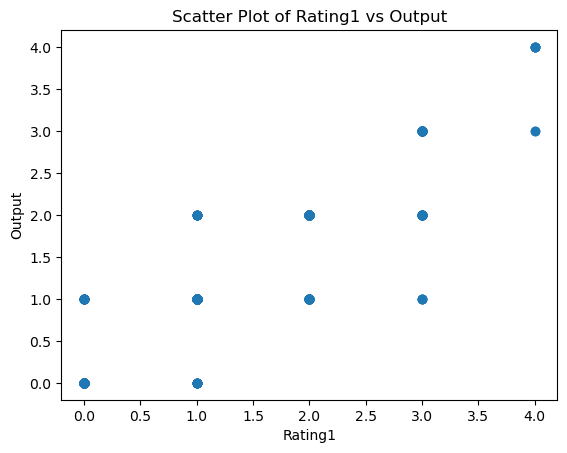

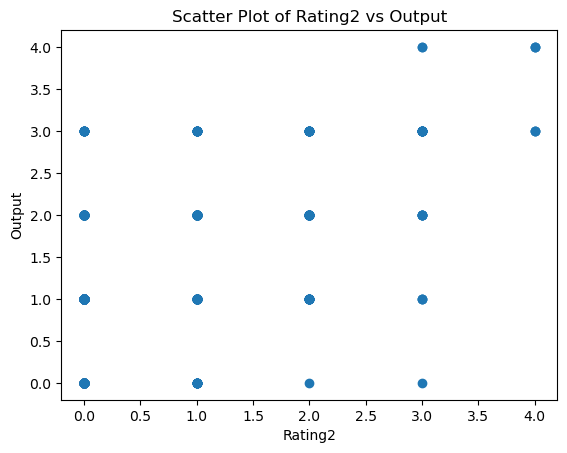

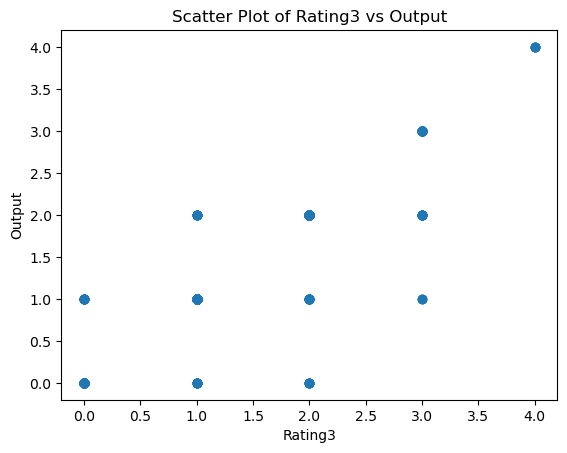

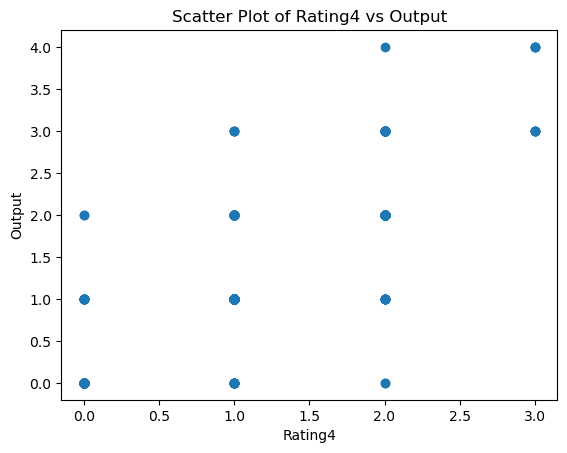

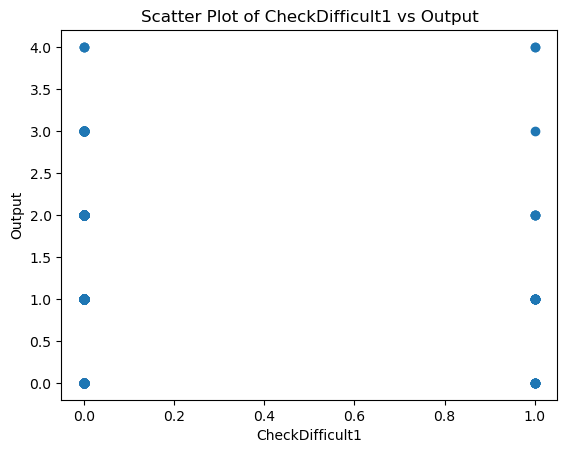

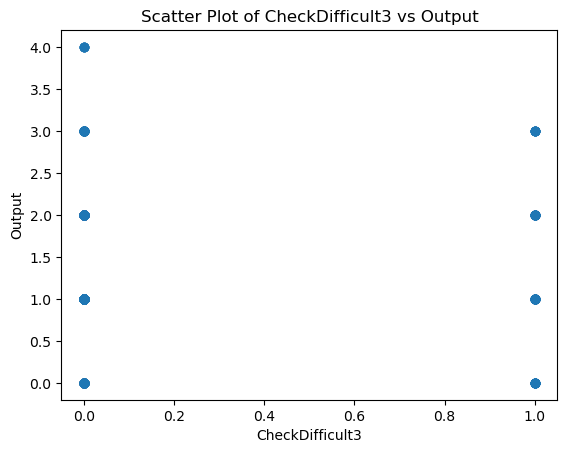

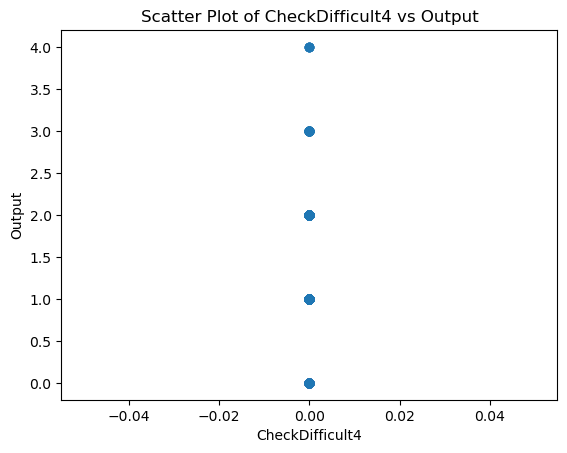

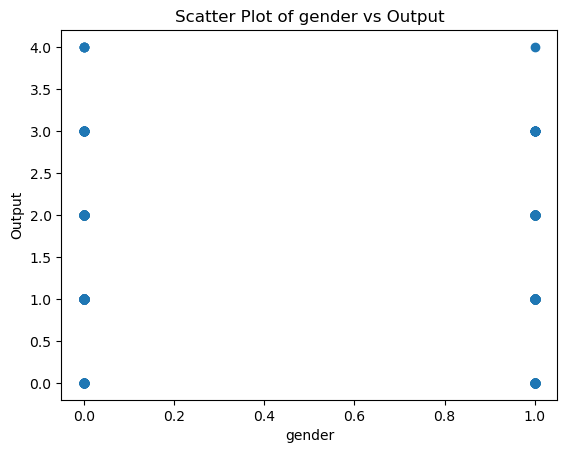

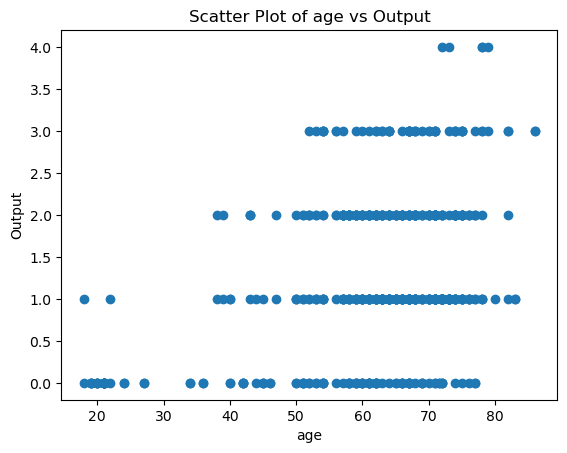

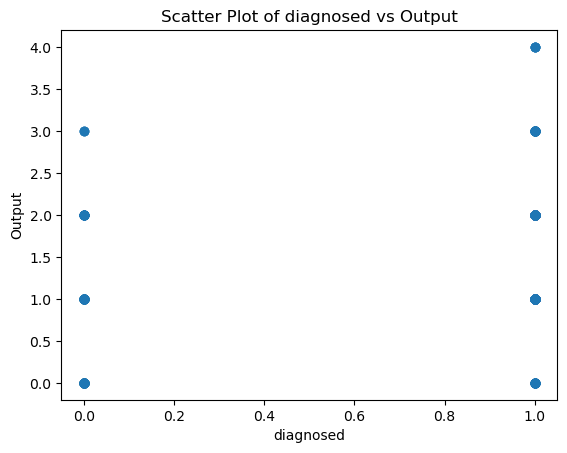

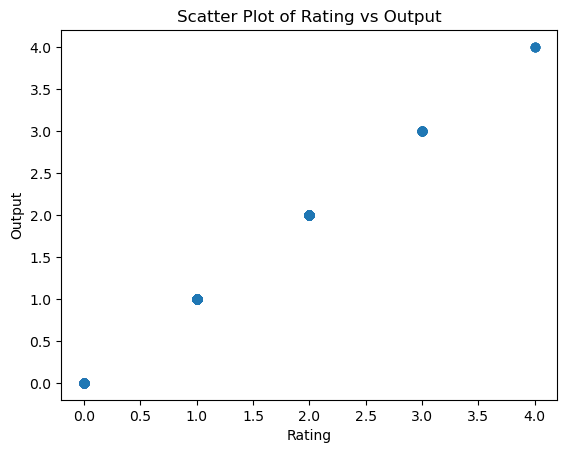

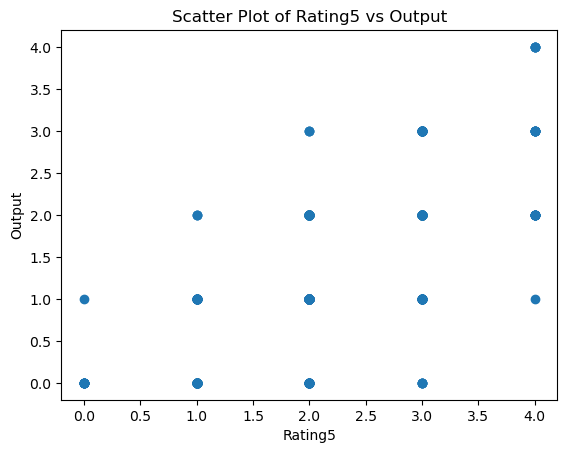

In [23]:
for feature in numerical_features:
    data = dataset
    
    # Check if 'Rating' column contains non-numeric values or missing values
    if not pd.to_numeric(data['Rating'], errors='coerce').notnull().all():
        print(f"Skipping {feature} due to non-numeric or missing values in 'Rating' column.")
        continue

    plt.scatter(data[feature], data['Rating'])
    plt.xlabel(feature)
    plt.ylabel('Output')
    plt.title(f'Scatter Plot of {feature} vs Output')
    plt.show()


Highly Correlated Features: {'amplitude_decrement_last_to_first_half_denoised', 'Rating', 'period_stdev_trimmed', 'period_min_trimmed', 'frequency_mean_trimmed', 'wrist_mvmnt_y_max', 'period_stdev_denoised', 'periodEntropy_trimmed', 'num_freeze_norm_trimmed', 'acceleration_max_denoised', 'acceleration_max_trimmed', 'speed_stdev_trimmed', 'wrist_mvmnt_x_mean', 'speed_max_trimmed', 'wrist_mvmnt_x_stdev', 'amplitude_min_denoised', 'frequency_median_denoised', 'wrist_mvmnt_y_mean', 'period_mean_trimmed', 'acceleration_stdev_denoised', 'acceleration_mean_trimmed', 'amplitude_min_trimmed', 'num_freeze_norm_denoised', 'speed_quartile_range_trimmed', 'period_median_trimmed', 'acceleration_mean_denoised', 'wrist_mvmnt_x_max', 'amplitude_quartile_range_trimmed', 'wrist_mvmnt_y_stdev', 'frequency_median_trimmed', 'period_max_denoised', 'num_interruptions_norm_trimmed', 'period_entropy_denoised', 'wrist_mvmnt_dist_stdev', 'amplitude_max_trimmed', 'acceleration_median_denoised', 'frequency_quartile

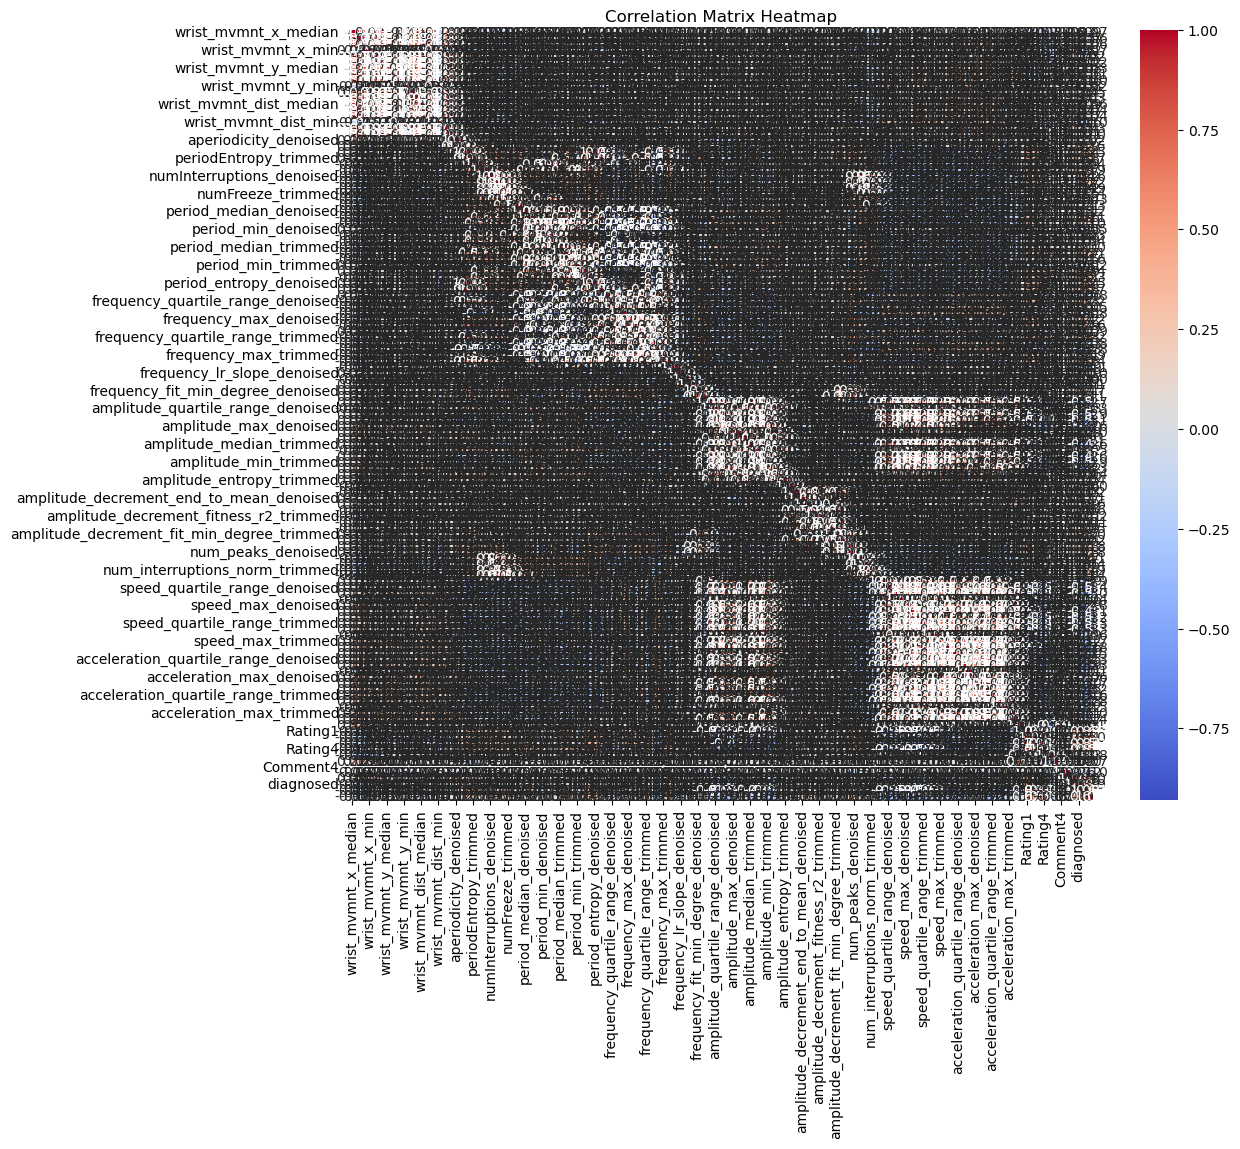

In [25]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = dataset[numeric_columns].corr()

# Identify highly correlated columns
correlated_features = set()
output_column = 'Rating'

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8 and correlation_matrix.columns[j] != output_column:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print('Highly Correlated Features:', correlated_features)

# Plot heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [26]:
# Drop highly correlated columns (excluding the output column)
df_dropped_corr = dataset.drop(columns=correlated_features)


In [27]:
df_dropped_corr.shape

(488, 65)

### Finding Outliers

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


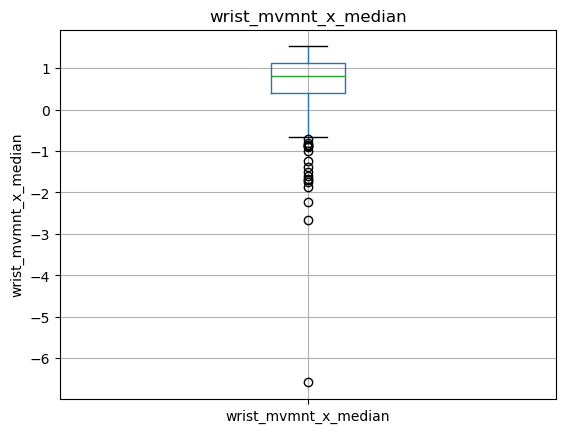

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


wrist_mvmnt_x_median has 18 outliers.


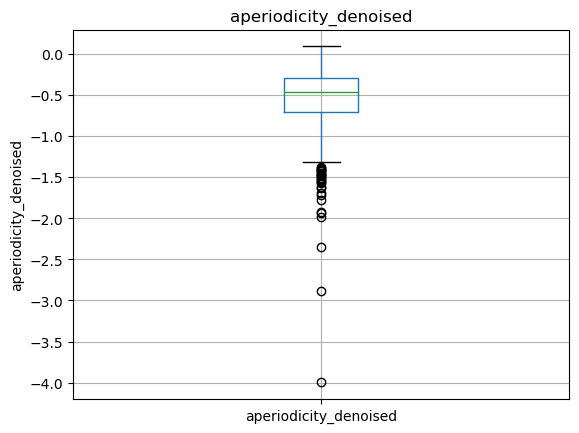

aperiodicity_denoised has 28 outliers.


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


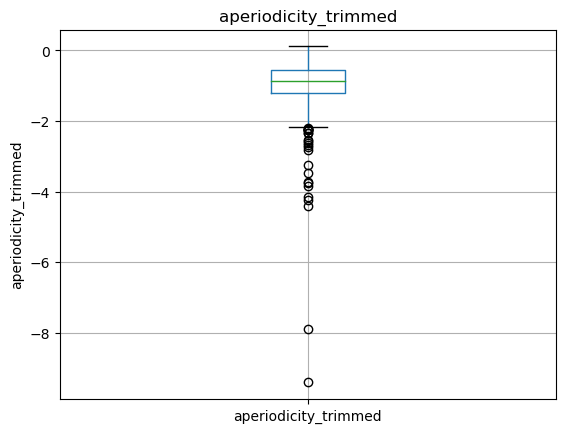

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


aperiodicity_trimmed has 25 outliers.


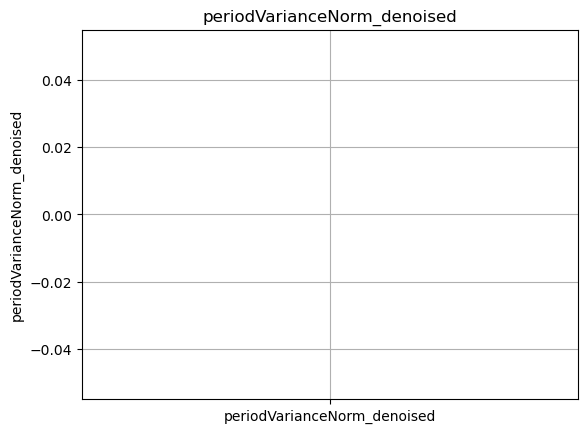

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


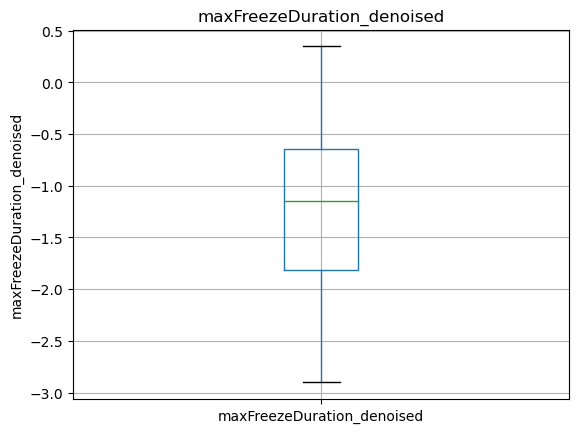

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


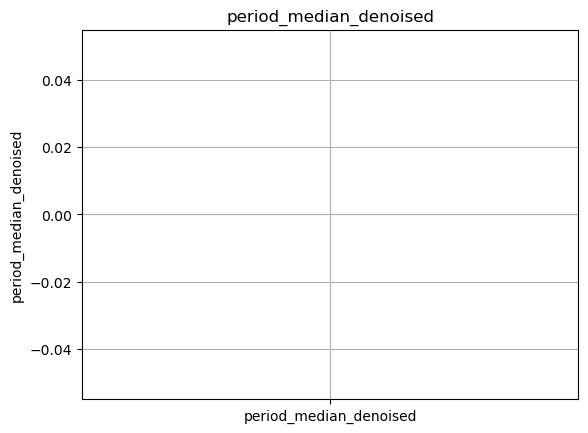

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


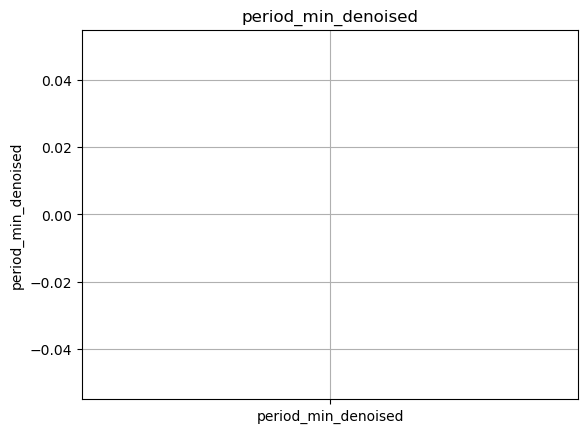

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


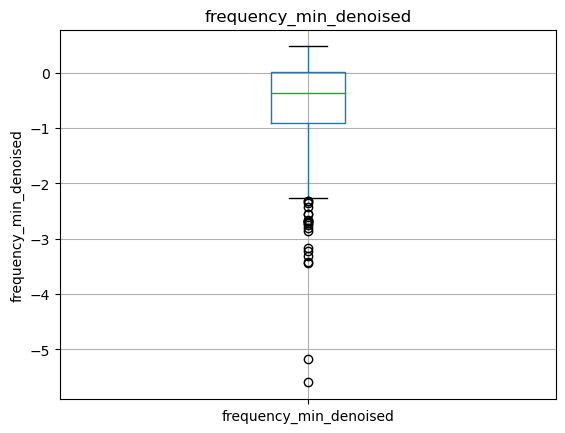

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


frequency_min_denoised has 22 outliers.


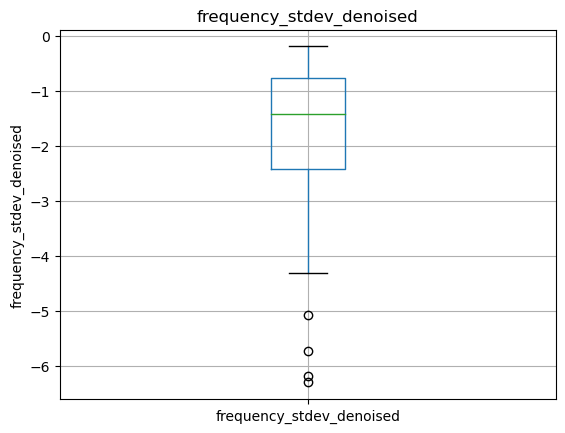

frequency_stdev_denoised has 4 outliers.


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


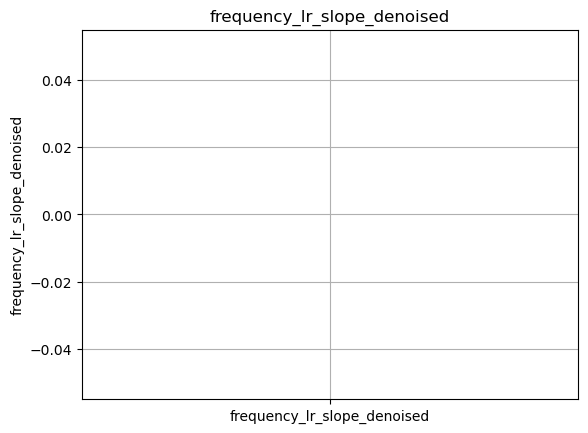

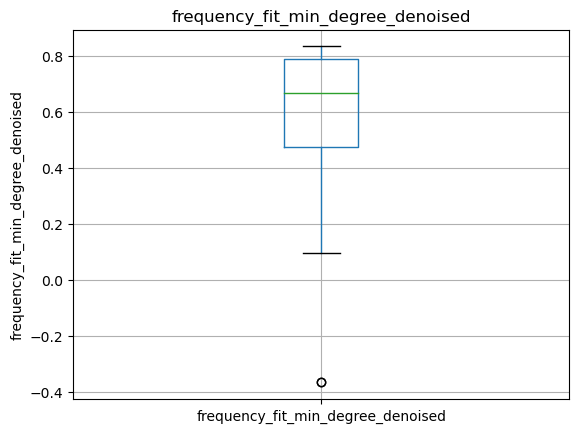

frequency_fit_min_degree_denoised has 2 outliers.


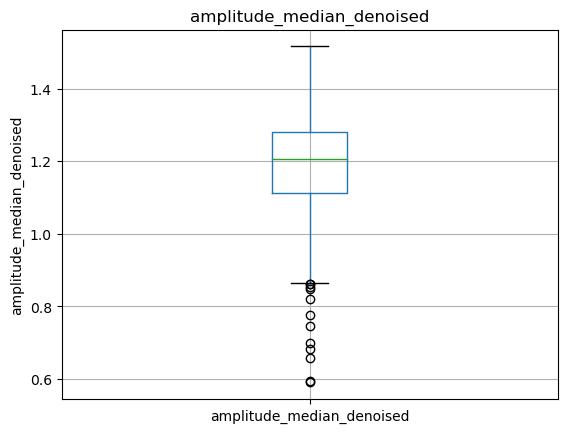

amplitude_median_denoised has 12 outliers.


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


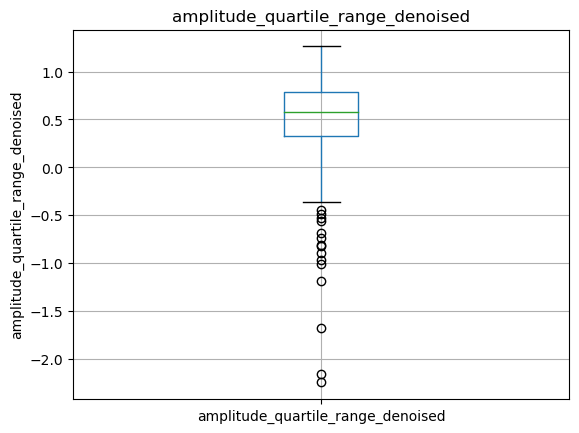

amplitude_quartile_range_denoised has 15 outliers.


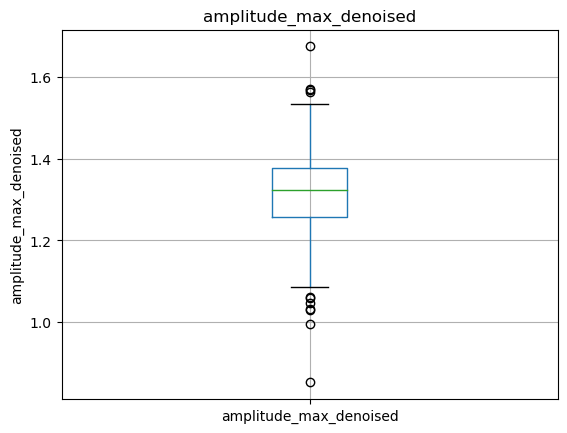

amplitude_max_denoised has 11 outliers.


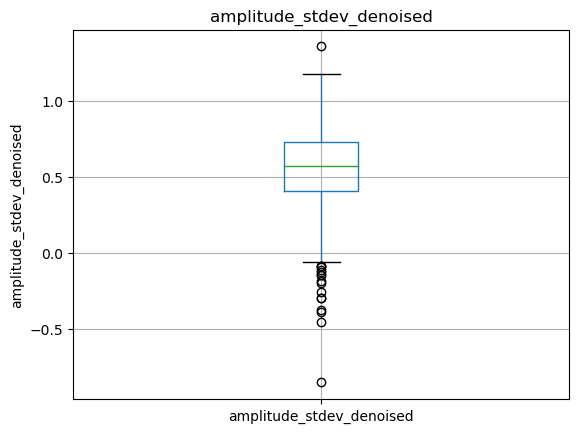

amplitude_stdev_denoised has 17 outliers.


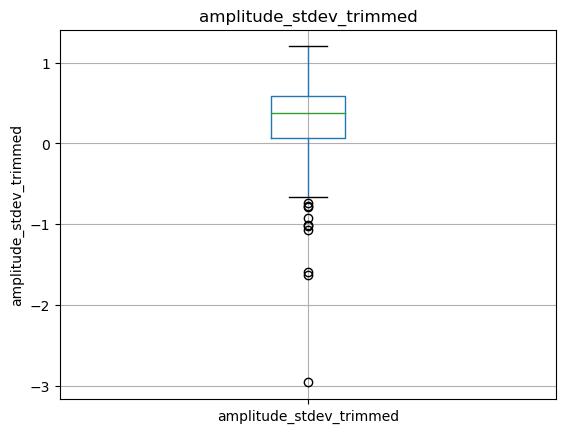

amplitude_stdev_trimmed has 10 outliers.


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


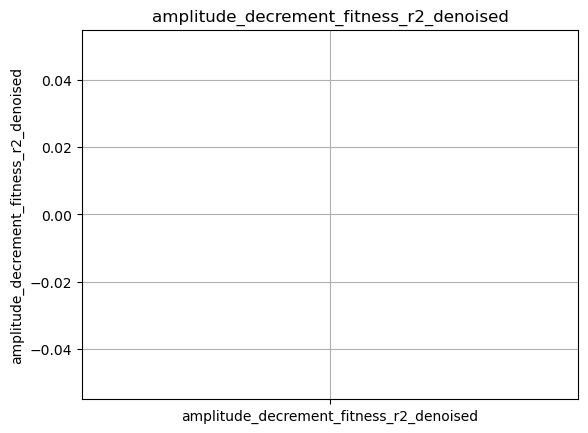

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


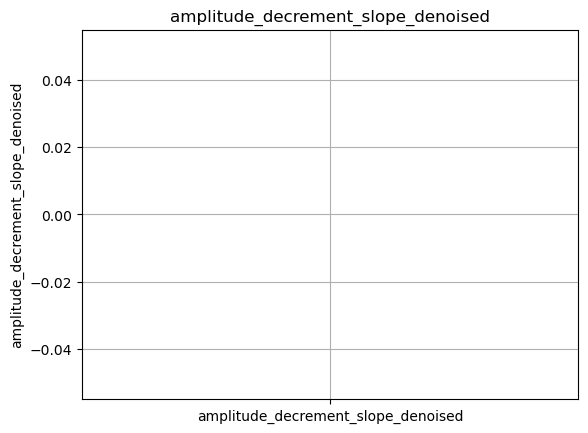

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


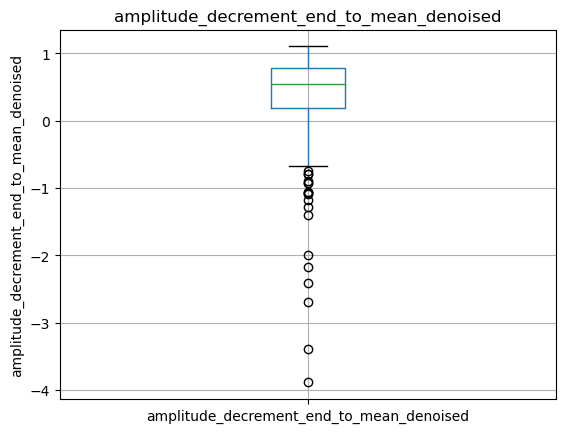

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


amplitude_decrement_end_to_mean_denoised has 19 outliers.


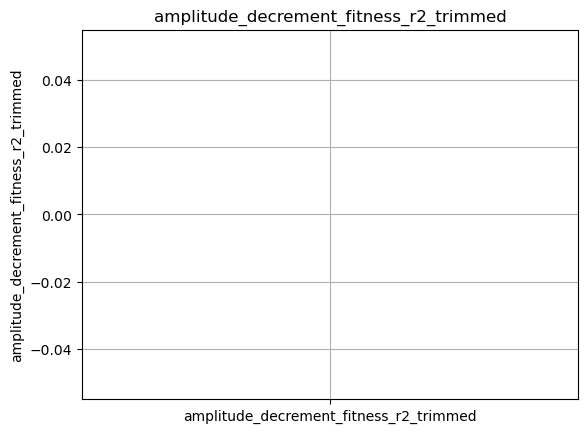

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


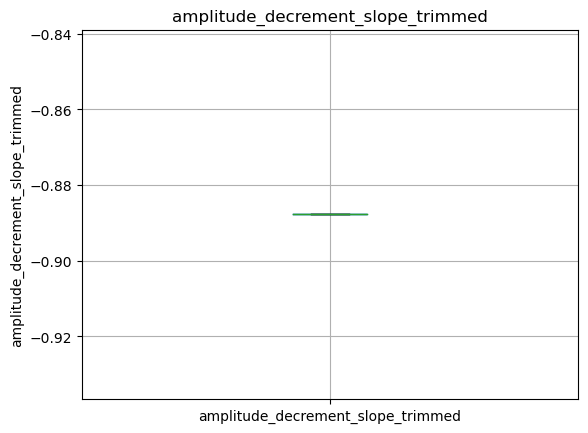

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


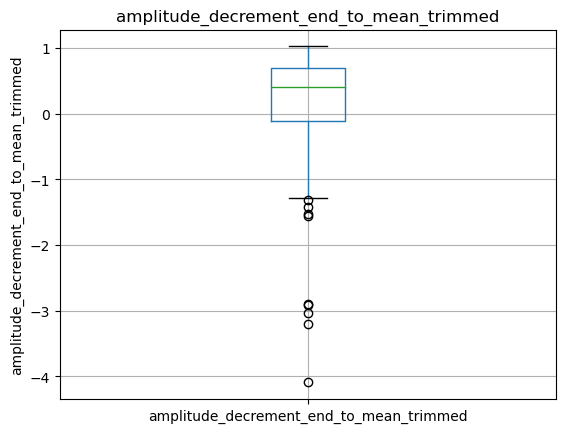

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


amplitude_decrement_end_to_mean_trimmed has 9 outliers.


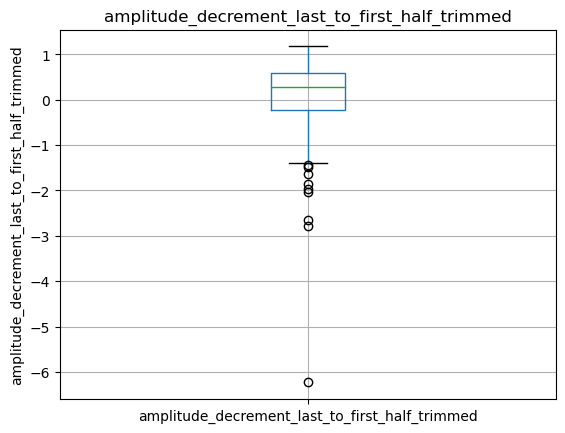

amplitude_decrement_last_to_first_half_trimmed has 9 outliers.


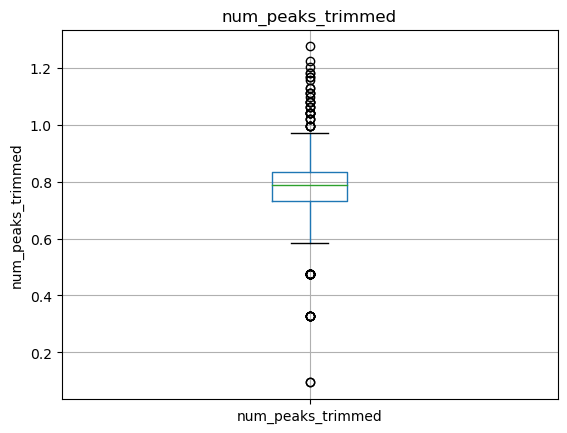

num_peaks_trimmed has 66 outliers.


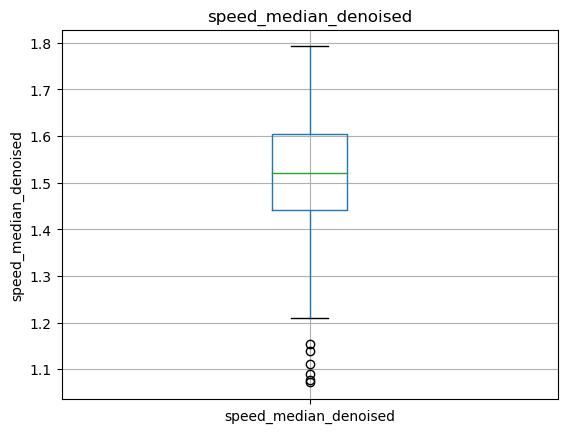

speed_median_denoised has 6 outliers.


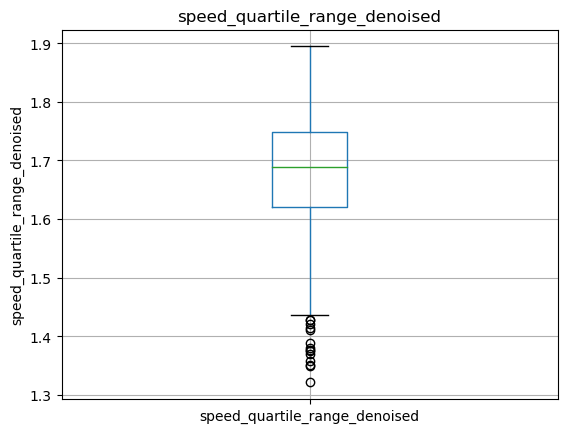

speed_quartile_range_denoised has 14 outliers.


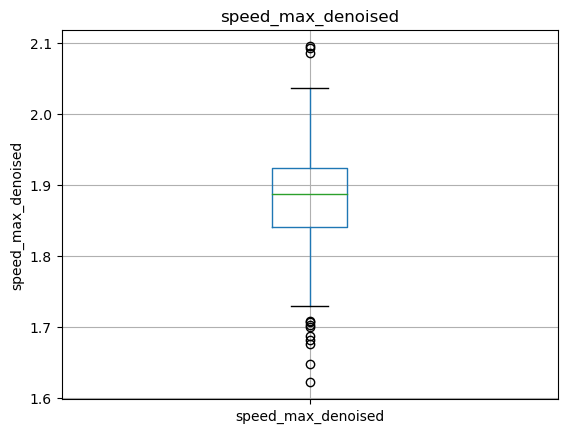

speed_max_denoised has 12 outliers.


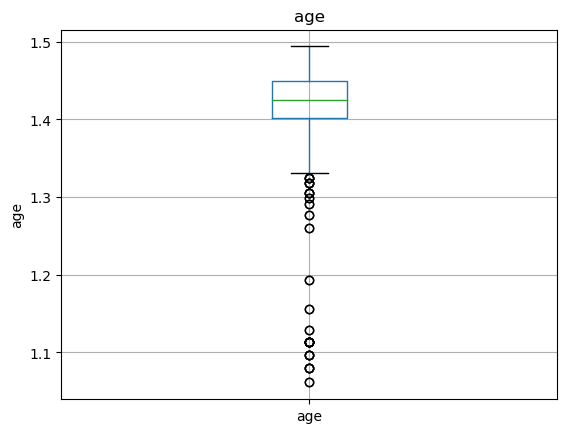

age has 46 outliers.
Outlier Counts: {'wrist_mvmnt_x_median': 18, 'aperiodicity_denoised': 28, 'aperiodicity_trimmed': 25, 'periodVarianceNorm_denoised': 0, 'maxFreezeDuration_denoised': 0, 'period_median_denoised': 0, 'period_min_denoised': 0, 'frequency_min_denoised': 22, 'frequency_stdev_denoised': 4, 'frequency_lr_slope_denoised': 0, 'frequency_fit_min_degree_denoised': 2, 'amplitude_median_denoised': 12, 'amplitude_quartile_range_denoised': 15, 'amplitude_max_denoised': 11, 'amplitude_stdev_denoised': 17, 'amplitude_stdev_trimmed': 10, 'amplitude_decrement_fitness_r2_denoised': 0, 'amplitude_decrement_slope_denoised': 0, 'amplitude_decrement_end_to_mean_denoised': 19, 'amplitude_decrement_fitness_r2_trimmed': 0, 'amplitude_decrement_slope_trimmed': 0, 'amplitude_decrement_end_to_mean_trimmed': 9, 'amplitude_decrement_last_to_first_half_trimmed': 9, 'num_peaks_trimmed': 66, 'speed_median_denoised': 6, 'speed_quartile_range_denoised': 14, 'speed_max_denoised': 12, 'age': 46}


In [29]:
# Dictionary to store outlier counts for each feature
outlier_counts = {}
numerical_features = [feature for feature in df_dropped_corr.columns if df_dropped_corr[feature].dtypes != 'O']
data = df_dropped_corr
for feature in numerical_features:
    

    # Check if 0 is in the unique values of the feature
    if 0 in data[feature].unique():
        pass
    else:
        # Log-transform the feature
        data[feature] = np.log(data[feature])

        # Create a boxplot
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

        # Identify and count outliers
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        outliers = (data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))
        outlier_count = outliers.sum()

        # Print feature name and outlier count
        if outlier_count > 0:
            print(f"{feature} has {outlier_count} outliers.")

        # Store the outlier count in the dictionary
        outlier_counts[feature] = outlier_count

# Print the dictionary with outlier counts
print("Outlier Counts:", outlier_counts)


In [30]:
# Dictionary to store outlier counts for each feature
outlier_counts_before = {}
outlier_counts_after = {}


for i, feature in enumerate(numerical_features):
    
    # Check if 0 is in the unique values of the feature
    if 0 in data[feature].unique():
        pass
    else:
        # Identify and count outliers before handling
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        outliers_before_sum = (data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))
        outlier_count_before = outliers_before_sum.sum()

        # Store the outlier count in the dictionary
        outlier_counts_before[feature] = outlier_count_before

        # Replace outliers with median
        data.loc[outliers_before_sum, feature] = data[feature].median()

        # Identify and count outliers after handling
        outliers_after_sum = (data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))
        outlier_count_after = outliers_after_sum.sum()

        # Store the outlier count in the dictionary
        outlier_counts_after[feature] = outlier_count_after


# Print the dictionary with outlier counts before handling
print("Outlier Counts Before:", outlier_counts_before)

# Print the dictionary with outlier counts after handling
print("Outlier Counts After:", outlier_counts_after)



Outlier Counts Before: {'wrist_mvmnt_x_median': 18, 'aperiodicity_denoised': 28, 'aperiodicity_trimmed': 25, 'periodVarianceNorm_denoised': 0, 'maxFreezeDuration_denoised': 0, 'period_median_denoised': 0, 'period_min_denoised': 0, 'frequency_min_denoised': 22, 'frequency_stdev_denoised': 4, 'frequency_lr_slope_denoised': 0, 'frequency_fit_min_degree_denoised': 2, 'amplitude_median_denoised': 12, 'amplitude_quartile_range_denoised': 15, 'amplitude_max_denoised': 11, 'amplitude_stdev_denoised': 17, 'amplitude_stdev_trimmed': 10, 'amplitude_decrement_fitness_r2_denoised': 0, 'amplitude_decrement_slope_denoised': 0, 'amplitude_decrement_end_to_mean_denoised': 19, 'amplitude_decrement_fitness_r2_trimmed': 0, 'amplitude_decrement_slope_trimmed': 0, 'amplitude_decrement_end_to_mean_trimmed': 9, 'amplitude_decrement_last_to_first_half_trimmed': 9, 'num_peaks_trimmed': 66, 'speed_median_denoised': 6, 'speed_quartile_range_denoised': 14, 'speed_max_denoised': 12, 'age': 46}
Outlier Counts After:

# Apply Linear Regression

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

target_variable = 'Rating'

# Split the data into features (X) and target variable (y)
data = dataset
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training Set Count: {X_train.shape}')
print(f'Test Set Count: {X_test.shape}')

print('Training Set:')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'R-squared (R2): {r2_train}')

print('\nTest Set:')
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'R-squared (R2): {r2_test}')


Training Set Count: (390, 131)
Test Set Count: (98, 131)
Training Set:
Mean Squared Error (MSE): 0.05749338514969201
R-squared (R2): 0.9388928137991813

Test Set:
Mean Squared Error (MSE): 0.13187357670586736
R-squared (R2): 0.8570687472426193


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


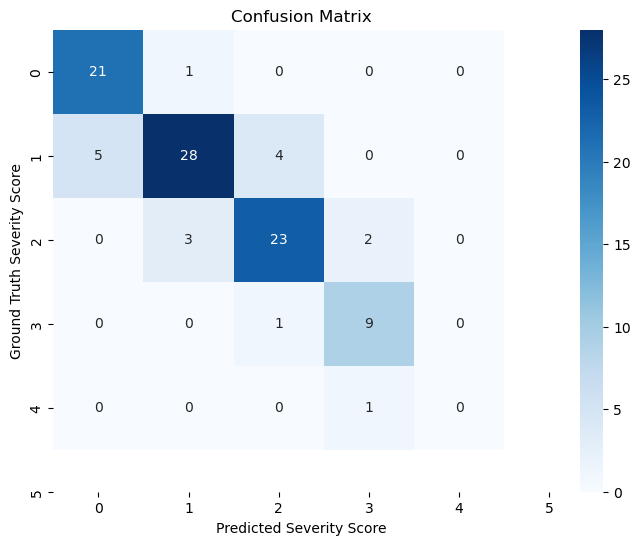

In [33]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test contains the actual values and y_pred contains the predicted values
y_test = np.round(y_test).astype(int)
y_pred = np.round(y_test_pred).astype(int)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5])
plt.xlabel("Predicted Severity Score")
plt.ylabel("Ground Truth Severity Score")
plt.title("Confusion Matrix")
plt.show()


# Conclusion

#### Training Set:

Mean Squared Error (MSE): 0.05749338514969201

The MSE on the training set is relatively low, indicating that the model is fitting the training data well with moderate error.

R-squared (R2): 0.9388928137991813

The R-squared value on the training set is close to 1.0, suggesting that your model explains a high proportion of the variance in the target variable.


#### Test Set:

Mean Squared Error (MSE): 0.13187357670586736

The MSE on the test set is larger than the training set, which is expected. However, the magnitude of the MSE should be considered in the context of your specific problem.

R-squared (R2): 0.8570687472426193

The R-squared value on the test set is relatively high, indicating that model performs well in explaining the variability in the target variable in the test data.
In summary, model appears to perform well on both the training and test sets. The R-squared values indicate a good fit to the data, and the MSE values are reasonably low. 